In [1001]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델

# Tree
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [1002]:
df= pd.read_csv('/home/piai/바탕화면/B4_보험/대출보험.csv', index_col = 0, encoding='euc-kr')
df.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
0,1,0,1,0,0,0,9001,9001,9001,0,...,20000000,20000000,0,0,10,0,0,0,50,1
1,2,0,1,0,0,0,24001,0,24001,0,...,7000000,36000000,0,0,0,300000,2,5,50,1
2,3,0,0,1,3,2,15001,9001,0,3001,...,11000000,11000000,0,0,0,0,0,2,60,2
3,4,1,0,2,4,2,6001,3001,0,3001,...,4000000,4000000,0,0,0,0,0,1,35,1
4,5,0,4,0,0,0,21001,15001,21001,0,...,4000000,4000000,0,0,0,500000,2,1,45,1


In [1003]:
df.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G            464
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G     45709
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
LT1Y_CLOD_RATE           0
STRT_CRDT_GRAD           0
LTST_CRDT_GRAD           0
PREM_OVDU_RATE           0
LT1Y_PEOD_RATE           0
AVG_STLN_RATE            0
STLN_REMN_AMT            0
L

## 결측치 및 이상치

* OCCP_NAME_G            464 (직업)
* LAST_CHLD_AGE         1027 (막내 나이)
* MATE_OCCP_NAME_G     45709 (배우자 직업)

In [1004]:
df['OCCP_NAME_G'].unique()

array(['공무원', '자영업', '주부', '학생', '3차산업 종사자', '기업/단체 임원', '단순 사무직', '사무직',
       '단순 노무직', '*', '고소득 전문직', '2차산업 종사자', '운전직', '전문직', '기타',
       '예체능계 종사자', '1차산업 종사자', nan], dtype=object)

In [1005]:
df['MATE_OCCP_NAME_G'].unique()

array(['주부', '2차산업 종사자', nan, '단순 사무직', '사무직', '전문직', '기업/단체 임원', '자영업',
       '*', '기타', '운전직', '예체능계 종사자', '3차산업 종사자', '공무원', '1차산업 종사자', '학생',
       '고소득 전문직', '단순 노무직'], dtype=object)

In [1006]:
df['LAST_CHLD_AGE'].unique()

array([24., 29., 34.,  0., 14., 19.,  9.,  4., nan, 39., 44., 49., 60.,
       59., 54.])

#### OCCP_NAME_G(직업) 결측치, 이상치 처리

In [1007]:
# 직업의 NULL값을 무응답으로 처리
df['OCCP_NAME_G'].fillna('무응답', inplace=True)

In [1008]:
df['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
무응답           464
Name: OCCP_NAME_G, dtype: int64

In [1009]:
# 직업의 * 값을 무응답으로 처리
df['OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [1010]:
df['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
무응답          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

#### MATE_OCCP_NAME_G(배우자 직업) 결측치, 이상치 처리

In [1011]:
# 'MATE_JOB_INCM' 열이 0이 아니고 'MATE_OCCP_NAME_G' 열이 결측치인 행 선택
mask = (df['MATE_JOB_INCM'] != 0) & (df['MATE_OCCP_NAME_G'].isnull())

# 선택된 행의 'MATE_OCCP_NAME_G' 열을 '무응답'으로 채우기
df.loc[mask, 'MATE_OCCP_NAME_G'] = '무응답'

# 나머지 'MATE_OCCP_NAME_G' 열의 결측치를 '배우자 없음'으로 채우기
df['MATE_OCCP_NAME_G'].fillna('배우자 없음', inplace=True)

In [1012]:
df['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
무응답           360
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

In [1013]:
df['MATE_OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [1014]:
df['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
무응답          1387
단순 사무직       1316
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

#### LAST_CHLD_AGE(막내나이) 결측값

In [1015]:
df['LAST_CHLD_AGE'].value_counts()

0.0     50125
24.0    10774
19.0     9651
29.0     7905
14.0     5801
34.0     5600
39.0     4297
9.0      2862
44.0     1221
4.0       544
49.0      330
54.0       46
60.0       33
59.0       17
Name: LAST_CHLD_AGE, dtype: int64

In [1016]:
df['LAST_CHLD_AGE'].isnull().sum()

1027

In [1017]:
# 결측값을 KNN보간법으로 처리하기 위하여 변수들간 상관관계 확인
df.corr()['LAST_CHLD_AGE']

CUST_ID              0.001767
TARGET              -0.021266
BNK_LNIF_CNT        -0.007348
CPT_LNIF_CNT        -0.019383
SPART_LNIF_CNT       0.010164
ECT_LNIF_CNT         0.032922
TOT_LNIF_AMT         0.041163
TOT_CLIF_AMT         0.021346
BNK_LNIF_AMT         0.022599
CPT_LNIF_AMT        -0.009114
CRDT_OCCR_MDIF       0.066958
SPTCT_OCCR_MDIF      0.075368
CRDT_CARD_CNT        0.019596
CTCD_OCCR_MDIF       0.098527
CB_GUIF_CNT          0.022137
CB_GUIF_AMT          0.017837
CUST_JOB_INCM       -0.160491
HSHD_INFR_INCM       0.128827
ACTL_FMLY_NUM        0.611842
CUST_FMLY_NUM        0.207177
LAST_CHLD_AGE        1.000000
MATE_JOB_INCM        0.211298
CRDT_LOAN_CNT        0.138272
MIN_CNTT_DATE        0.162544
TOT_CRLN_AMT         0.120381
TOT_REPY_AMT         0.115229
CRLN_OVDU_RATE       0.125099
CRLN_30OVDU_RATE     0.035256
LT1Y_CLOD_RATE       0.027591
STRT_CRDT_GRAD       0.067917
LTST_CRDT_GRAD       0.096891
PREM_OVDU_RATE       0.076861
AVG_STLN_RATE        0.116409
STLN_REMN_

In [1018]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'LAST_CHLD_AGE'열과 'ACTL_FMLY_NUM'열을 선택하여 보간 수행
columns_to_interpolate = ['LAST_CHLD_AGE', 'ACTL_FMLY_NUM']
df[columns_to_interpolate] = imputer.fit_transform(df[columns_to_interpolate])

* ACTL_FMLY_NUM(가족수) LAST_CHLD_AGE(막내나이)변수의 주변 5개 평균으로 결측처리 완료

In [1019]:
df['LAST_CHLD_AGE'].value_counts()

0.0     50125
24.0    10774
19.0     9676
29.0     7905
14.0     5801
34.0     5600
39.0     4297
9.0      2862
44.0     1221
4.0       544
22.0      334
49.0      330
12.4      308
7.8       245
31.0      107
54.0       46
60.0       33
59.0       17
18.0        8
Name: LAST_CHLD_AGE, dtype: int64

#### AGE, SEX열 '*'값

In [1020]:
df[df['AGE']== '*']['AGE'].count()

430

In [1021]:
df[df['SEX']== '*']['SEX'].count()

430

* 일단 추후에 성별, 나이를 사용하는 분석 or 모델링에서는 '*'를 제외하고 사용하도록 하자
* 다른 컬럼의 값은 유효하므로 바로 제거하는 판단은 x

## 파생변수 생성

#### 양육기 변수 생성

In [1022]:
# '양육기' 컬럼 추가 및 초기화
df['양육기'] = '양육기 후'

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기' 컬럼에 값을 할당
df.loc[df[['LAST_CHLD_AGE', 'AGE']].min(axis=1) <= 20, '양육기'] = '양육기'
df.loc[df[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기'] = '양육기 전'
# 나이가 0인 값은 20살보다 작지만 값이 없기 때문에 양육기가 아닌 것으로 분류.

* 막내자녀가 없는 가입자와 20세 미만인 가입자, 20세 초과인 가입자 이렇게 세분류로 분류

#### 양육기간 변수 생성

In [1023]:
# '양육기간' 컬럼 추가 및 초기화
df['양육기간'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기간' 컬럼에 값을 할당
df['양육기간'] = df[['LAST_CHLD_AGE', 'AGE']].min(axis=1)
df['양육기간'] = df['양육기간'].apply(lambda x: 30 - x if x <= 30 else 0)
df.loc[df[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기간'] = 0

* 보험사에서 보험계약기준으로 사용하는 30세를 기준으로 계약을 얼마나 할 수 있는나 30-막내나이 변수를 생성

In [1024]:
# df.to_csv("/home/piai/바탕화면/B4_보험/결측치처리완.csv", encoding = 'euc-kr')

In [1025]:
# 결측치 처리 완료
df.isnull().sum()

CUST_ID              0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CNT         0
TOT_LNIF_AMT         0
TOT_CLIF_AMT         0
BNK_LNIF_AMT         0
CPT_LNIF_AMT         0
CRDT_OCCR_MDIF       0
SPTCT_OCCR_MDIF      0
CRDT_CARD_CNT        0
CTCD_OCCR_MDIF       0
CB_GUIF_CNT          0
CB_GUIF_AMT          0
OCCP_NAME_G          0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
MATE_OCCP_NAME_G     0
MATE_JOB_INCM        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
LT1Y_CLOD_RATE       0
STRT_CRDT_GRAD       0
LTST_CRDT_GRAD       0
PREM_OVDU_RATE       0
LT1Y_PEOD_RATE       0
AVG_STLN_RATE        0
STLN_REMN_AMT        0
LT1Y_STLN_AMT        0
LT1Y_SLOD_RATE       0
GDINS_MON_PREM       0
SVINS_MON_PREM       0
FMLY_GDINS_MNPREM    0
FMLY_SVINS_MNPREM    0
MAX_MON_PRE

#### 해지한 고객과 유지한 고객 분리

In [1026]:
df['TERM/MAIN'] = ''
df.loc[df['CNTT_LAMT_CNT'] == 0, 'TERM/MAIN'] = 0 # 유지한 고객
df.loc[df['CNTT_LAMT_CNT'] != 0, 'TERM/MAIN'] = 1 # 해지한 고객
# TERM:해지 MAIN:유지 <-- 여긴 주석임

In [1027]:
df

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,TERM/MAIN
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,10,0,0,0,50,1,양육기 후,6.0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,300000,2,5,50,1,양육기 후,1.0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,2,60,2,양육기 후,0.0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,1,35,1,양육기 전,0.0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,500000,2,1,45,1,양육기,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,1,700000,0,3,55,2,양육기 후,0.0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,0,100000,0,3,45,2,양육기,11.0,0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,1,0,0,4,45,1,양육기,16.0,0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,0,45,1,양육기 전,0.0,0


------------------------완료------------------------------------

#### 대출한 적이 있는 고객과 없는 고객 분리---필요없는듯...?

In [208]:
# 최초대출날짜 값을 DATETIME 형식으로 변경

def convert_to_datetime(x):
    if x != 0:
        return pd.to_datetime(str(x) + '01', format='%Y%m%d')
    # MIN_CNTT_DATE는 정수형이기 때문에 문자열로 바꾼 후,
    # datetime 함수는 '일'이라는 정보가 필요하기 때문에 임의로 01일 추가
    else:
        return pd.NaT  
    
df['MIN_CNTT_DATE'] = df['MIN_CNTT_DATE'].apply(convert_to_datetime)
df['MIN_CNTT_DATE']

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
100228   NaT
100229   NaT
100230   NaT
100231   NaT
100232   NaT
Name: MIN_CNTT_DATE, Length: 100233, dtype: datetime64[ns]

In [209]:
# 최초대출날짜 값이 있는 사람은 대출을 한 사람, 없는 사람은 대출하지않은 사람으로 볼 수있음
# LNIF_TARGET : 대출여부, 1: 대출한 적있음 0: 대출한 적없음


df['LNIF_TARGET'] = df['MIN_CNTT_DATE'].apply(lambda x: 0 if pd.isna(x) else 1)
df['LNIF_TARGET']

0         0
1         0
2         0
3         0
4         0
         ..
100228    0
100229    0
100230    0
100231    0
100232    0
Name: LNIF_TARGET, Length: 100233, dtype: int64

In [210]:
df['LNIF_TARGET'].value_counts()
# 대출한 적이 있는 사람은 9867명, 없는 사람은 90366명이라는 것을 알 수있다.

0    90366
1     9867
Name: LNIF_TARGET, dtype: int64

In [211]:
df['TARGET'].value_counts()

# 대출연체 발생한 사람: 4287
# 대출연체 발생하지않은 사람: 95946

# 대출&대출연체: 4287, 대출&대출연체X: 5580
# 대출X->대출연체X: 90366 // 90366 + 5580 = 95946

0    95946
1     4287
Name: TARGET, dtype: int64

## 실가족원수 분포

(array([21953.,     0., 22910.,     0.,     0., 23444.,     0.,     0.,
        23542.,     0.,     0.,  6490.,     0.,     0.,  1599.,     0.,
            0.,   255.,     0.,    40.]),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]),
 <BarContainer object of 20 artists>)

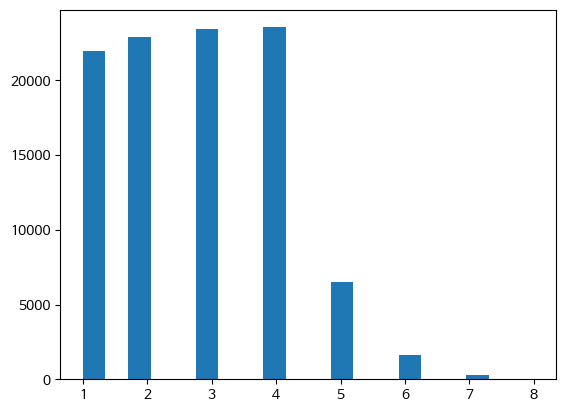

In [908]:
plt.hist(df['ACTL_FMLY_NUM'], bins = 20)

## 타사에서 대출한 건수 VS 당사에서 대출한 건수

#### 총 대출건수(타사)

In [933]:
# 그냥 대출건수 총합(신용대출X) 
# 은행+카드사/할부사/캐피탈+2산업분류+기타

df['TOTAL_LOAN_COUNT'] = df['BNK_LNIF_CNT'] + df['CPT_LNIF_CNT'] + df['SPART_LNIF_CNT'] + df['ECT_LNIF_CNT']

<Axes: >

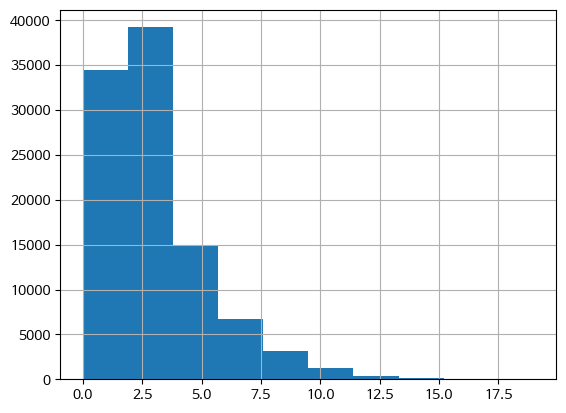

In [934]:
df['TOTAL_LOAN_COUNT'].hist()

In [935]:
df['TOTAL_LOAN_COUNT'].value_counts()

1     34465
2     27161
3     12059
4     10094
5      4750
6      4537
7      2217
8      2112
9      1092
10      843
11      399
12      251
13      119
14       69
15       46
16       10
17        4
0         3
18        1
19        1
Name: TOTAL_LOAN_COUNT, dtype: int64

#### 자사에서 대출한 건수

<Axes: >

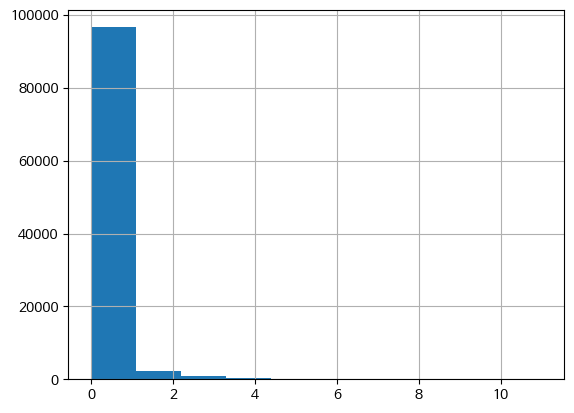

In [936]:
df['CRDT_LOAN_CNT'].hist()

In [937]:
df['CRDT_LOAN_CNT'].value_counts()

0     90366
1      6256
2      2156
3       808
4       336
5       145
6        71
7        43
8        23
9        15
11       14
Name: CRDT_LOAN_CNT, dtype: int64

* 실가족원수

<Axes: >

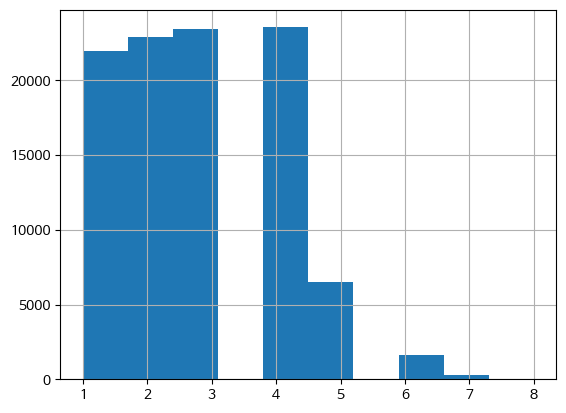

In [910]:
df['ACTL_FMLY_NUM'].hist()

In [911]:
df['ACTL_FMLY_NUM'].unique()

array([4., 2., 5., 3., 1., 6., 7., 8.])

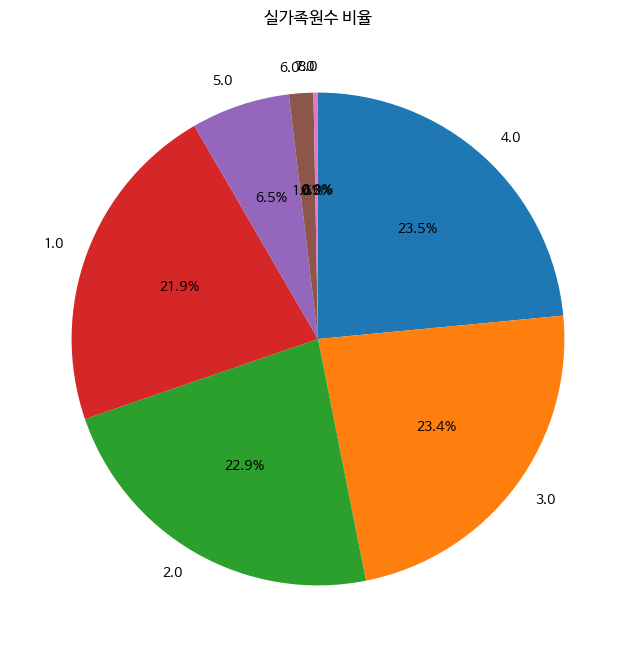

In [912]:
family_size_counts = df['ACTL_FMLY_NUM'].value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
family_size_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('실가족원수 비율')
plt.ylabel('')  # Hiding the y-label as it's not necessary for a pie chart
plt.show()

* 가족 수별 그룹화
1인: 1인가구

2 ~ 4인: 2 ~ 4인가구

5인이상: 5인이상가구(대가족)

5인이상 대가족 기준: 법....?

(다자녀)...

In [913]:
def categorize_family_size(size):
    if size == 1:
        return '1인가구'
    elif 2 <= size <= 4:
        return '2~4인가구'
    elif 5 <= size <= 8:
        return '5인이상가구'

df['FAMILY_GROUP'] = df['ACTL_FMLY_NUM'].apply(categorize_family_size)

* 직업군 분류

In [915]:
df['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
무응답          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

In [916]:
#특정 열 이름
column_name = 'OCCP_NAME_G'
#해당 열 추출
occupation_column = df[column_name]
def classify_occupation(occupation):
    if occupation in ['기업/단체 임원', '고소득 전문직', '전문직']:
        return '고소득 전문직'
    elif occupation in ['단순 사무직', '사무직', '공무원']:
        return '사무직 및 관리직'
    elif occupation in ['3차산업 종사자', '자영업']:
        return '서비스 및 판매직'
    elif occupation in ['2차산업 종사자', '1차산업 종사자', '운전직', '단순노무직']:
        return '기술직 및 생산직'
    elif occupation in ['예체능계 종사자']:
        return '예체능계 종사자'
    else:
        return '학생 및 비경제 활동/기타'
# 'OCCP_NAME_G' 컬럼을 바탕으로 새로운 '직업재분류' 컬럼 생성
df['직업재분류'] = df['OCCP_NAME_G'].apply(classify_occupation)
# 새로운 분류를 저장할 컬럼 추가
df['직업재분류'] = occupation_column.apply(classify_occupation)
# 결과 확인
print(df[['OCCP_NAME_G', '직업재분류']])

       OCCP_NAME_G           직업재분류
0              공무원       사무직 및 관리직
1              자영업       서비스 및 판매직
2               주부  학생 및 비경제 활동/기타
3               학생  학생 및 비경제 활동/기타
4              공무원       사무직 및 관리직
...            ...             ...
100228         자영업       서비스 및 판매직
100229         운전직       기술직 및 생산직
100230         자영업       서비스 및 판매직
100231         사무직       사무직 및 관리직
100232         사무직       사무직 및 관리직

[100233 rows x 2 columns]


In [917]:
df['직업재분류'].value_counts()

학생 및 비경제 활동/기타    35546
사무직 및 관리직         25779
서비스 및 판매직         17760
기술직 및 생산직         12905
고소득 전문직            7307
예체능계 종사자            936
Name: 직업재분류, dtype: int64

### 연령대별 

In [918]:
df['AGE'].unique()

array(['50', '60', '35', '45', '40', '55', '25', '30', '*', '65', '20',
       '70'], dtype=object)

In [919]:
df['AGE'].value_counts()

45    19052
50    17734
55    15321
40    14807
35    12003
60     9190
30     5268
65     3584
25     2201
*       430
70      403
20      240
Name: AGE, dtype: int64

In [920]:
# AGE_G 생성
def age_group(age):
    if age in ['20', '25']:
        return '20대'
    elif age in ['30', '35']:
        return '30대'
    elif age in ['40', '45']:
        return '40대'
    elif age in ['50', '55']:
        return '50대'
    elif age in ['60', '65']:
        return '60대'
    elif age == '70':
        return '70대'
    else:
        return '알수없음'

# 새로운 AGE_G 컬럼 추가
df['AGE_G'] = df['AGE'].apply(age_group)

In [921]:
df

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,TERM/MAIN,FAMILY_GROUP,직업재분류,AGE_G
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,50,1,양육기 후,6.0,0,2~4인가구,사무직 및 관리직,50대
1,2,0,1,0,0,0,24001,0,24001,0,...,2,5,50,1,양육기 후,1.0,0,2~4인가구,서비스 및 판매직,50대
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,2,60,2,양육기 후,0.0,0,2~4인가구,학생 및 비경제 활동/기타,60대
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,1,35,1,양육기 전,0.0,0,2~4인가구,학생 및 비경제 활동/기타,30대
4,5,0,4,0,0,0,21001,15001,21001,0,...,2,1,45,1,양육기,16.0,0,2~4인가구,사무직 및 관리직,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,3,55,2,양육기 후,0.0,0,2~4인가구,서비스 및 판매직,50대
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,3,45,2,양육기,11.0,0,5인이상가구,기술직 및 생산직,40대
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,4,45,1,양육기,16.0,0,2~4인가구,서비스 및 판매직,40대
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,45,1,양육기 전,0.0,0,1인가구,사무직 및 관리직,40대


## 가족 수 별 해지율

In [926]:
cross_tab = pd.crosstab(df['FAMILY_GROUP'], df['TERM/MAIN'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", df)
print("기대 빈도:", expected)

Chi-square 통계량: 1137.965690648758
p-값: 7.832311977612129e-248
자유도: 2
기대 빈도: [[20130.09916894  1822.90083106]
 [64092.0790558   5803.9209442 ]
 [ 7687.82177526   696.17822474]]


In [927]:
cross = pd.crosstab(index=df['FAMILY_GROUP'], columns = df['TERM/MAIN'])

In [928]:
cross

TERM/MAIN,0,1
FAMILY_GROUP,,
1인가구,21047,906
2~4인가구,63804,6092
5인이상가구,7059,1325


In [929]:
cross['rate'] = cross[1] / (cross[0] + cross[1]) * 100

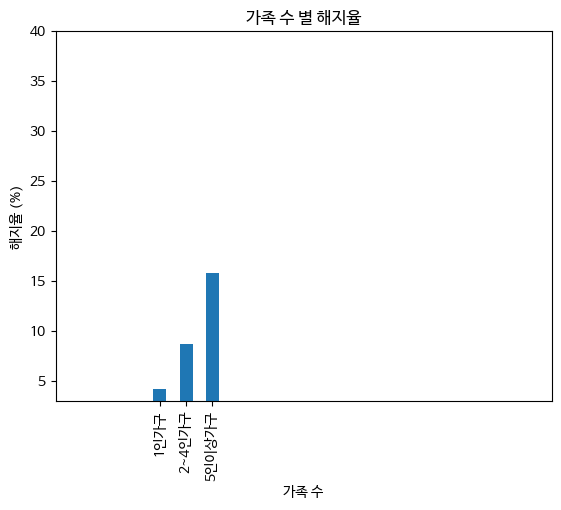

In [931]:
cross['rate'].plot.bar()
plt.title('가족 수 별 해지율')
plt.xlabel('가족 수')
plt.ylabel('해지율 (%)')

plt.xlim(-4, 15)
plt.ylim(3, 40)
cross.round(2).head(14)
plt.show()

## 가족 수 별 타사/자사 대출이용수

* 대출이용수--대출 건수 별 고객수가 있는데 가족수로 모든 대출이용수를 합치는게 맞나...?
-> 합친다면 건수별로 있는 고객들을 다 합치는 것

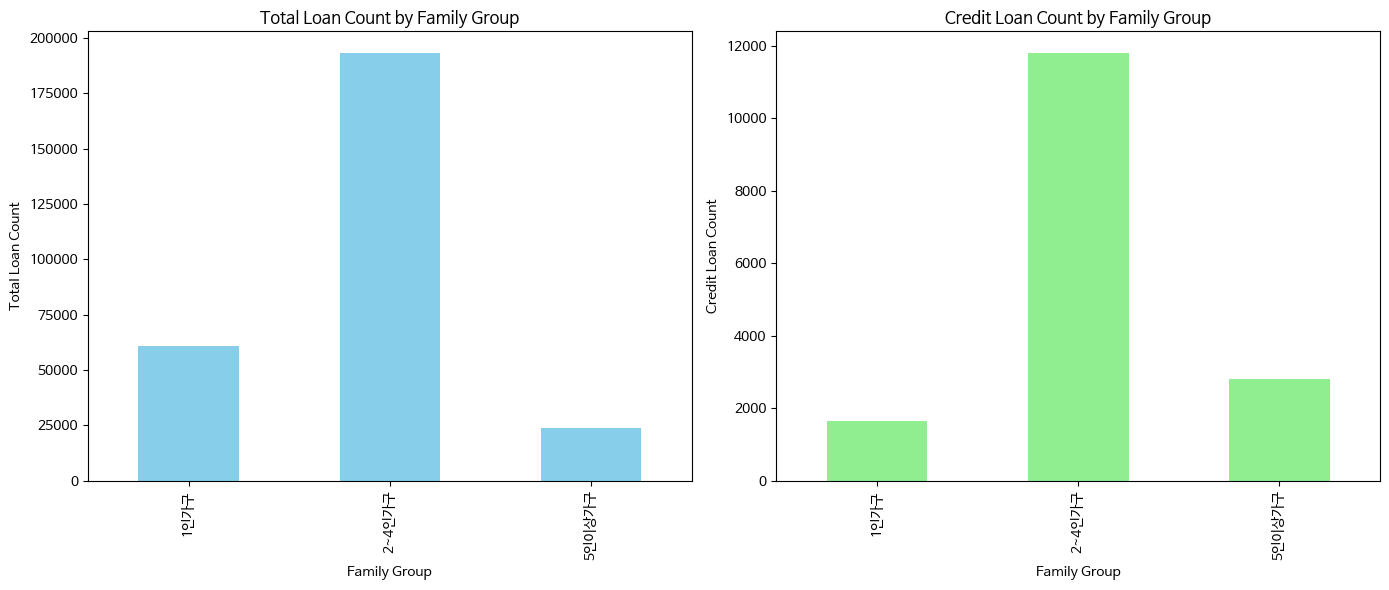

In [966]:
plt.figure(figsize=(14, 6))

# Histogram for 'TOTAL_LOAN_COUNT'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
df.groupby('FAMILY_GROUP')['TOTAL_LOAN_COUNT'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Loan Count by Family Group')
plt.xlabel('Family Group')
plt.ylabel('Total Loan Count')

# Histogram for 'CRDT_LOAN_CNT'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
df.groupby('FAMILY_GROUP')['CRDT_LOAN_CNT'].sum().plot(kind='bar', color='lightgreen')
plt.title('Credit Loan Count by Family Group')
plt.xlabel('Family Group')
plt.ylabel('Credit Loan Count')

# Displaying the plot
plt.tight_layout()
plt.show()

## 가족 수별 타사 대출 이용률

가족 수 별 그룹

가족 수 별 그룹의 타사 대출 이용건수 모두 더하고 자사 대출이용건수 모두 더해서 비율 구하기--카이제곱검정

In [942]:
# 1인 가구의 타사 대출이용건수 총합
TLS1 = df[df['FAMILY_GROUP'] == '1인가구']['TOTAL_LOAN_COUNT'].sum()

# 1인 가구의 자사 대출이용건수 총합
CLS1 = df[df['FAMILY_GROUP'] == '1인가구']['CRDT_LOAN_CNT'].sum()

In [947]:
TLS1

60682

In [943]:
# 2~4인 가구의 타사 대출이용건수 총합
TLS2 = df[df['FAMILY_GROUP'] == '2~4인가구']['TOTAL_LOAN_COUNT'].sum()

# 2~4인 가구의 자사 대출이용건수 총합
CLS2 = df[df['FAMILY_GROUP'] == '2~4인가구']['CRDT_LOAN_CNT'].sum()

In [944]:
# 5인 이상 가구의 타사 대출이용건수 총합
TLS3 = df[df['FAMILY_GROUP'] == '5인이상가구']['TOTAL_LOAN_COUNT'].sum()

# 5인 이상 가구의 자사 대출이용건수 총합
CLS3 = df[df['FAMILY_GROUP'] == '5인이상가구']['CRDT_LOAN_CNT'].sum()

In [953]:
FM_CHI = pd.DataFrame({'1인가구':[TLS1, CLS1], '2~4인가구':[TLS2, CLS2], '5인이상가구':[TLS3, CLS3]}, index=['TLS', 'CLS'])

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest
chi, pval, dof, expected = stats.chi2_contingency(FM_CHI)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 2295.23
 p-value : 0.000
 degree of freedom: 2
 expected value: 
[[ 58882. 193820.  25152.]
 [  3446.  11343.   1472.]]


In [961]:
FM_CHI

,1인가구,2~4인가구,5인이상가구
TLS,60682,193354,23818
CLS,1646,11809,2806


In [962]:
60682/(60682+1646)

0.9735913233217816

In [963]:
proportions = FM_CHI.loc['TLS'] / (FM_CHI.loc['TLS'] + FM_CHI.loc['CLS'])*100

proportions

1인가구      97.359132
2~4인가구    94.244089
5인이상가구    89.460637
dtype: float64

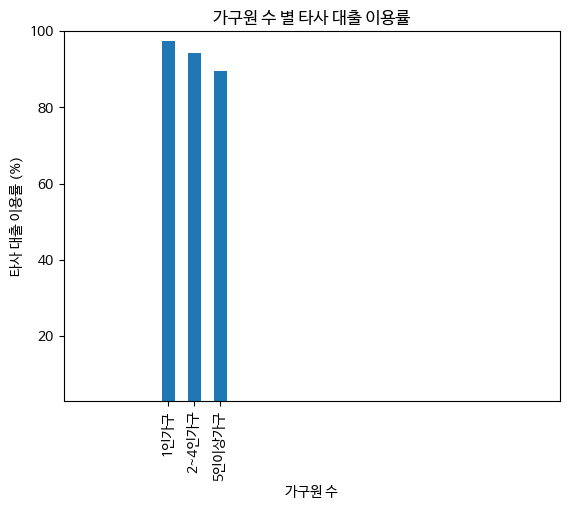

In [965]:
proportions.plot.bar()
plt.title('가구원 수 별 타사 대출 이용률')
plt.xlabel('가구원 수')
plt.ylabel('타사 대출 이용률 (%)')

plt.xlim(-4, 15)
plt.ylim(3, 100)
cross.round(2).head(14)
plt.show()

--------------------------

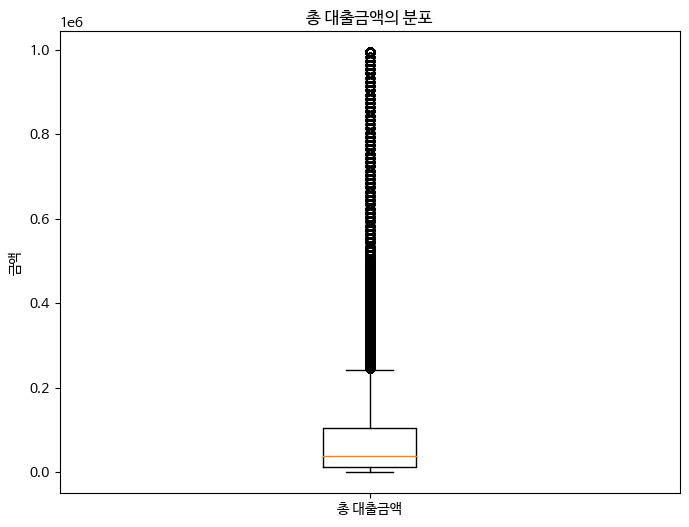

In [401]:
import matplotlib.pyplot as plt

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.
# 'TOT_LNIF_AMT'는 총 대출금액을 나타냅니다.

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(df['TOT_LNIF_AMT'].dropna())  # NaN 값 제거
plt.title('총 대출금액의 분포')
plt.ylabel('금액')
plt.xticks([1], ['총 대출금액'])
plt.show()



In [402]:
df['TOT_LNIF_AMT'].max()

994001

In [94]:
# 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT' 열 선택
loan_columns = ['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT']
# 각 행별로 가장 큰 값과 해당하는 컬럼명을 찾아 'MAX_LNIF_CNT' 컬럼 생성
df['MAX_LNIF_CNT'] = df[loan_columns].apply(lambda row: ','.join(row.index[row == row.max()]), axis=1)
# 결과 확인
print(df[['BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT', 'MAX_LNIF_CNT']].head())

   BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT    MAX_LNIF_CNT
0             1             0               0             0    BNK_LNIF_CNT
1             1             0               0             0    BNK_LNIF_CNT
2             0             1               3             2  SPART_LNIF_CNT
3             0             2               4             2  SPART_LNIF_CNT
4             4             0               0             0    BNK_LNIF_CNT


In [ ]:
# 연령대별, 부양가족수 

## 해지/유지고객이 각각 타사에서 대출받은 총 금액과 당사에서 대출받은 총 금액(약관대출) 비교

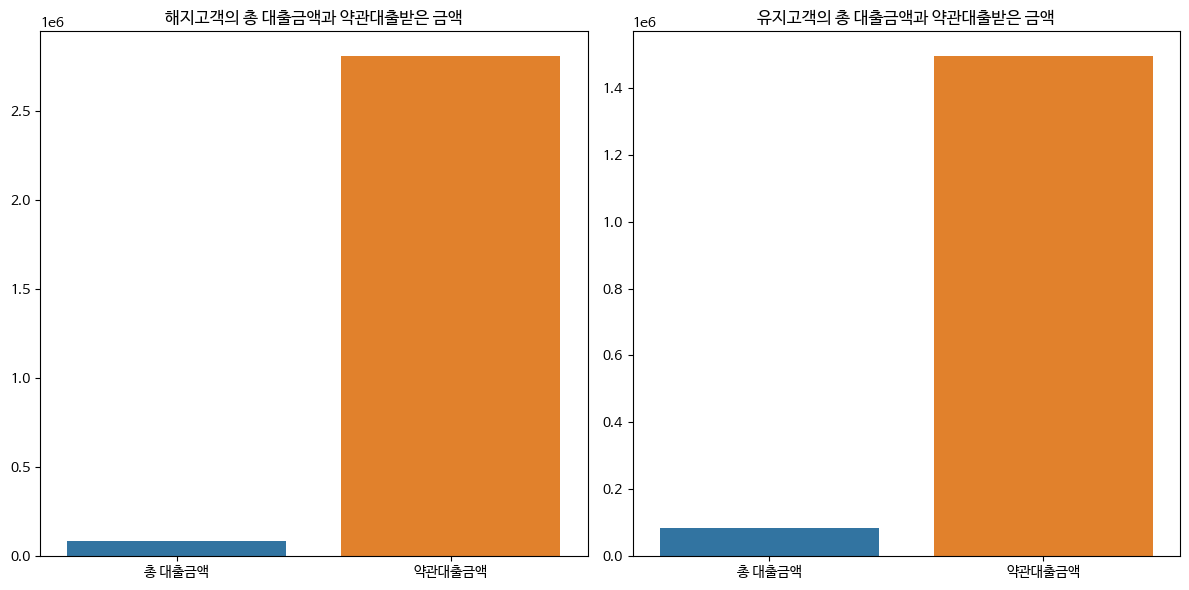

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.
# 'customer_status'는 고객의 상태 (해지: 1, 유지: 0)를 나타내는 열이라고 가정합니다.
# 'total_loan_amount'는 총 대출금액을, 'policy_loan_amount'는 약관대출받은 금액을 나타냅니다.

# 해지고객과 유지고객으로 데이터를 분리
terminated_customers = df[df['TERM/MAIN'] == 1]
retained_customers = df[df['TERM/MAIN'] == 0]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 해지고객의 총 대출금액과 약관대출받은 금액
plt.subplot(1, 2, 1)
sns.barplot(x=['총 대출금액', '약관대출금액'], y=[terminated_customers['TOT_LNIF_AMT'].mean(), terminated_customers['STLN_REMN_AMT'].mean()])
plt.title('해지고객의 총 대출금액과 약관대출받은 금액')

# 유지고객의 총 대출금액과 약관대출받은 금액
plt.subplot(1, 2, 2)
sns.barplot(x=['총 대출금액', '약관대출금액'], y=[retained_customers['TOT_LNIF_AMT'].mean(), retained_customers['STLN_REMN_AMT'].mean()])
plt.title('유지고객의 총 대출금액과 약관대출받은 금액')

plt.tight_layout()
plt.show()


## 보험회사 VS 타기관 대출금액 비교

In [669]:
# LNIF_AMT = 은행권, 카드사, 할부사, 캐피탈에서 발생한 총 대출금액
df['LNIF_AMT'] = df['BNK_LNIF_AMT'] + df['CPT_LNIF_AMT']

In [670]:
df['LNIF_AMT']

0          9001
1         24001
2          3001
3          3001
4         21001
          ...  
100228    57001
100229    54001
100230    27001
100231        0
100232    18001
Name: LNIF_AMT, Length: 100233, dtype: int64

In [671]:
terminated_customers = df[df['TERM/MAIN'] == 1]
retained_customers = df[df['TERM/MAIN'] == 0]

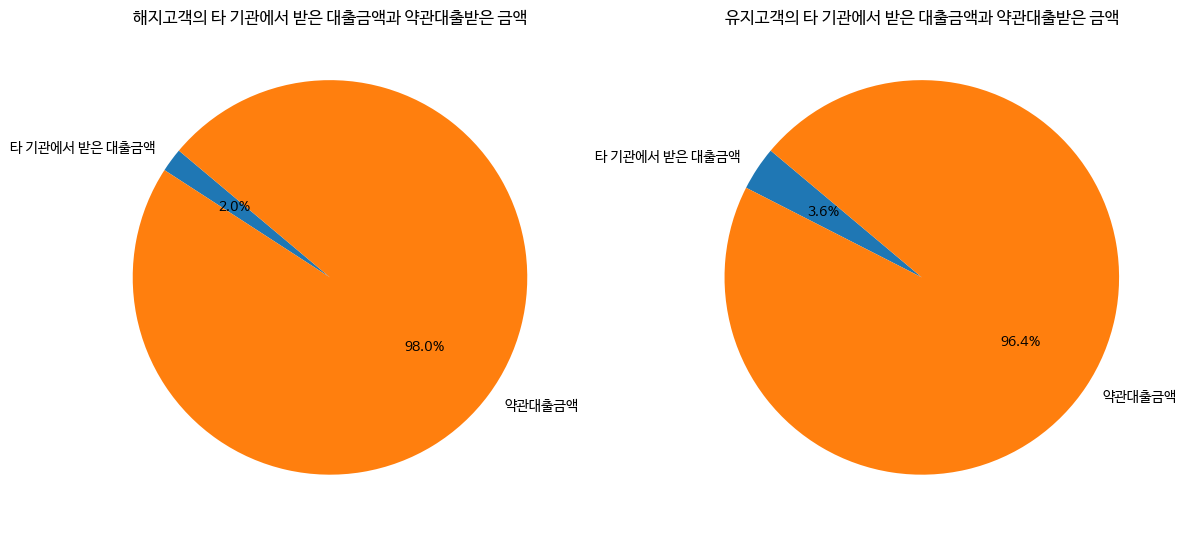

In [672]:
import matplotlib.pyplot as plt

# 해지고객의 타 기관에서 받은 대출금액과 약관대출받은 금액 평균
terminated_loan_avg = terminated_customers['LNIF_AMT'].mean()
terminated_policy_loan_avg = terminated_customers['STLN_REMN_AMT'].mean()

# 유지고객의 타 기관에서 받은 대출금액과 약관대출받은 금액 평균
retained_loan_avg = retained_customers['LNIF_AMT'].mean()
retained_policy_loan_avg = retained_customers['STLN_REMN_AMT'].mean()

# 해지고객 파이차트
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie([terminated_loan_avg, terminated_policy_loan_avg], labels=['타 기관에서 받은 대출금액', '약관대출금액'], autopct='%1.1f%%', startangle=140)
plt.title('해지고객의 타 기관에서 받은 대출금액과 약관대출받은 금액')

# 유지고객 파이차트
plt.subplot(1, 2, 2)
plt.pie([retained_loan_avg, retained_policy_loan_avg], labels=['타 기관에서 받은 대출금액', '약관대출금액'], autopct='%1.1f%%', startangle=140)
plt.title('유지고객의 타 기관에서 받은 대출금액과 약관대출받은 금액')

plt.show()


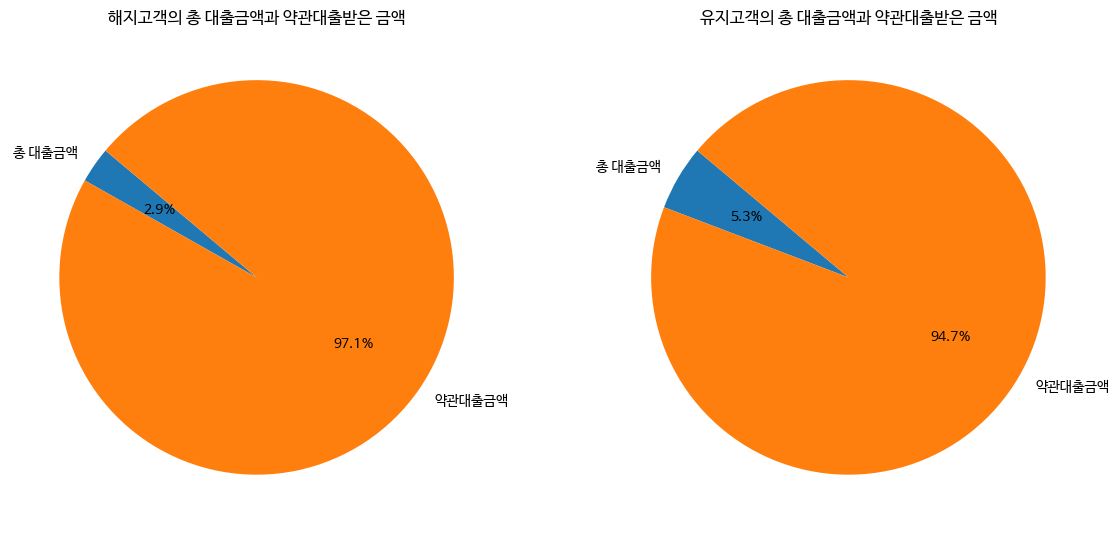

In [359]:
import matplotlib.pyplot as plt

# 해지고객의 총 대출금액과 약관대출받은 금액 평균
terminated_loan_avg = terminated_customers['TOT_LNIF_AMT'].mean()
terminated_policy_loan_avg = terminated_customers['STLN_REMN_AMT'].mean()

# 유지고객의 총 대출금액과 약관대출받은 금액 평균
retained_loan_avg = retained_customers['TOT_LNIF_AMT'].mean()
retained_policy_loan_avg = retained_customers['STLN_REMN_AMT'].mean()

# 해지고객 파이차트
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie([terminated_loan_avg, terminated_policy_loan_avg], labels=['총 대출금액', '약관대출금액'], autopct='%1.1f%%', startangle=140)
plt.title('해지고객의 총 대출금액과 약관대출받은 금액')

# 유지고객 파이차트
plt.subplot(1, 2, 2)
plt.pie([retained_loan_avg, retained_policy_loan_avg], labels=['총 대출금액', '약관대출금액'], autopct='%1.1f%%', startangle=140)
plt.title('유지고객의 총 대출금액과 약관대출받은 금액')

plt.show()


고객별로 총대출금액과 약관대출받은 금액에 차이가 있다/없다
=> 해지고객: 다른 곳에서 대출을 받을 수 없으니까 해지를 많이한다
=> 

H0: 해지고객과 유지고객 별로 총 대출받은 금액에 차이가 없다.
H1: 해지고객과 유지고객 별로 총 대출받은 금액에 차이가 있다.

2 sample t-test

In [393]:
MAIN = df[df['TERM/MAIN']== 0]
TERM = df[df['TERM/MAIN']== 1]

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,TERM/MAIN
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,10,0,0,0,50,1,0,6.0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,300000,2,5,50,1,0,1.0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,2,60,2,0,0.0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,1,35,1,0,0.0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,500000,2,1,45,1,1,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,1,700000,0,3,55,2,0,0.0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,0,100000,0,3,45,2,1,11.0,0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,1,0,0,4,45,1,1,16.0,0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,0,45,1,0,0.0,0


In [395]:
from scipy import stats
# 정규성검정
statistic, p = stats.shapiro(MAIN['TOT_LNIF_AMT'])
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.624264121055603, p-value = 0.0


In [396]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(MAIN['TOT_LNIF_AMT'], TERM['TOT_LNIF_AMT'], alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 381222652.5
p-value: 0.6176998510498132


H0: 해지고객과 유지고객 별로 약관대출받은 금액에 차이가 없다.
H1: 해지고객과 유지고객 별로 약관대출받은 금액에 차이가 있다.

2 sample t-test

In [ ]:
MAIN = df[df['TERM/MAIN']== 0]
TERM = df[df['TERM/MAIN']== 1]

In [397]:
from scipy import stats
# 정규성검정
statistic, p = stats.shapiro(MAIN['STLN_REMN_AMT'])
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.2899678945541382, p-value = 0.0


In [398]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(MAIN['STLN_REMN_AMT'], TERM['STLN_REMN_AMT'], alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 329128405.0
p-value: 9.445853796645274e-205


In [ ]:
# 해지고객과 유지고객 별로 약관대출받은 금액에 차이가 있다.

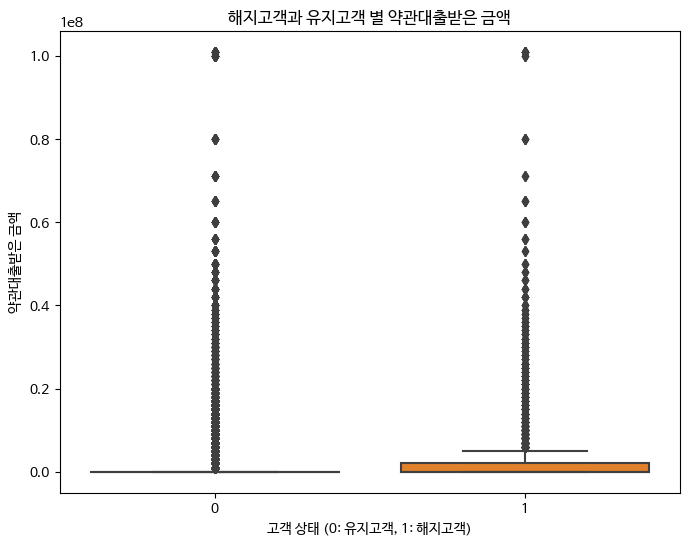

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'TERM/MAIN' 칼럼은 고객의 상태를 나타내며, 'STLN_REMN_AMT'는 약관대출받은 금액을 나타냅니다.
# 고객 상태가 '해지': 1, '유지': 0 또는 그와 유사한 방식으로 표현되어 있다고 가정합니다.

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x='TERM/MAIN', y='STLN_REMN_AMT', data=df)
plt.title('해지고객과 유지고객 별 약관대출받은 금액')
plt.xlabel('고객 상태 (0: 유지고객, 1: 해지고객)')
plt.ylabel('약관대출받은 금액')
plt.show()

해지고객이 약관대출을 더 많이 받는다
대출을 많이 받을수록 ~때문에 해지를 많이한다
~: 신용등급하락,,,

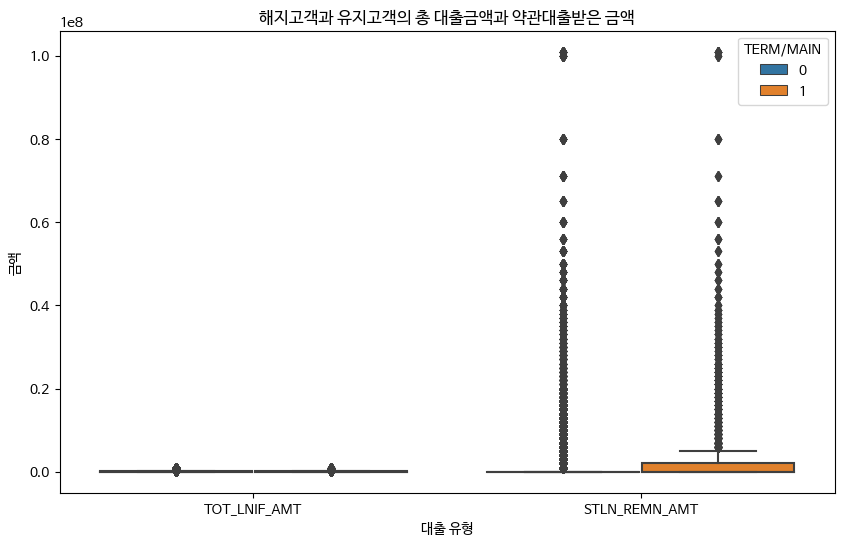

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 데이터를 재구조화하기 위해 melt 함수 사용
# 이렇게 하면 'customer_status', 'variable', 'value'라는 세 개의 열이 있는 새로운 데이터프레임이 생성됩니다.
melted_df = pd.melt(df, id_vars=['TERM/MAIN'], value_vars=['TOT_LNIF_AMT', 'STLN_REMN_AMT'], var_name='Loan Type', value_name='Amount')

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan Type', y='Amount', hue='TERM/MAIN', data=melted_df)

plt.title('해지고객과 유지고객의 총 대출금액과 약관대출받은 금액')
plt.xlabel('대출 유형')
plt.ylabel('금액')
plt.show()

----------------------------------------------

In [976]:
df['LTST_CRDT_GRAD'].value_counts()

0     94960
6      1296
5      1122
4       828
7       654
8       415
3       274
2       272
10      209
9       141
1        62
Name: LTST_CRDT_GRAD, dtype: int64

In [969]:
df['LTST_CRDT_GRAD'].unique()

array([ 0,  4,  5,  6,  7,  9,  8,  2,  3, 10,  1])

In [977]:
df['STRT_CRDT_GRAD'].value_counts()

0    96403
5      912
4      900
3      723
2      548
6      503
1      199
7       45
Name: STRT_CRDT_GRAD, dtype: int64

## 신용등급 차이해서 음수랑 양수로 해서 그룹화하기

In [971]:
# CRDT_GRAD = 최근신용등급 - 최초신용등급
df['CRDT_GRAD'] = (df['LTST_CRDT_GRAD']-df['STRT_CRDT_GRAD']) * (-1)
df['CRDT_GRAD']

0         0
1         0
2         0
3         0
4         0
         ..
100228    0
100229    0
100230    0
100231    0
100232    0
Name: CRDT_GRAD, Length: 100233, dtype: int64

In [973]:
df['CRDT_GRAD'].value_counts().sum()

100233

In [772]:
df['CRDT_GRAD'].unique()

array([  0,  -2,  -1,   1,  -9,  -3,  -5,  -8,  -4,  -7,  -6, -10,   2,
         3,   4])

In [978]:
cross_tab = pd.crosstab(df['CRDT_GRAD'], df['TERM/MAIN'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 471.7306456120558
p-값: 9.011262983013888e-92
자유도: 14
기대 빈도: [[8.98624206e+01 8.13757944e+00]
 [6.87722606e+01 6.22773937e+00]
 [1.56800754e+02 1.41992458e+01]
 [2.34742650e+02 2.12573504e+01]
 [3.93377331e+02 3.56226692e+01]
 [3.23688107e+02 2.93118933e+01]
 [3.14518472e+02 2.84815280e+01]
 [4.50229066e+02 4.07709337e+01]
 [7.96841260e+02 7.21587401e+01]
 [9.96739297e+02 9.02607026e+01]
 [8.78157581e+04 7.95224192e+03]
 [1.98981074e+02 1.80189259e+01]
 [4.67651372e+01 4.23486277e+00]
 [1.92562330e+01 1.74376702e+00]
 [3.66785390e+00 3.32146100e-01]]


In [979]:
cross = pd.crosstab(index=df['CRDT_GRAD'], columns = df['TERM/MAIN'])

In [980]:
cross

TERM/MAIN,0,1
CRDT_GRAD,,
-10,66,32
-9,61,14
-8,127,44
-7,216,40
-6,366,63
-5,311,42
-4,292,51
-3,422,69
-2,732,137


In [981]:
cross['rate'] = cross[1] / (cross[0] + cross[1]) * 100

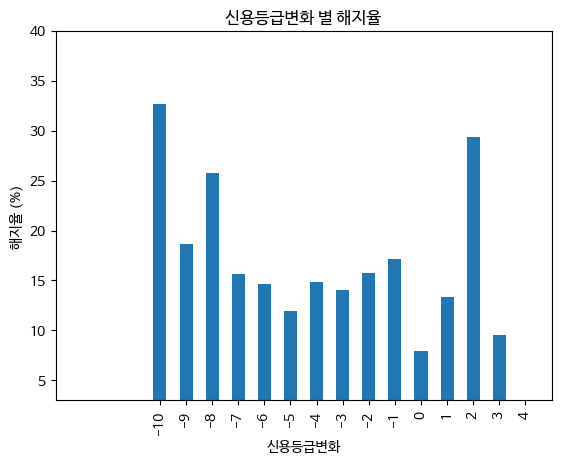

In [982]:
cross['rate'].plot.bar()
plt.title('신용등급변화 별 해지율')
plt.xlabel('신용등급변화')
plt.ylabel('해지율 (%)')

plt.xlim(-4, 15)
plt.ylim(3, 40)
cross.round(2).head(14)
plt.show()

In [983]:
# 신용등급 변화 별로 그룹화
df['CRDT_GRAD_GROUP'] = '0' # 신용등급 변화가 없는 사람
df.loc[df['CRDT_GRAD'] > 0, 'CRDT_GRAD_GROUP'] = 'Positive' # 신용등급이 오른사람
df.loc[df['CRDT_GRAD'] < 0, 'CRDT_GRAD_GROUP'] = 'Negative' # 신용등급이 내려간사람

# 결과 확인
print(df[['CRDT_GRAD', 'CRDT_GRAD_GROUP']].head())

   CRDT_GRAD CRDT_GRAD_GROUP
0          0               0
1          0               0
2          0               0
3          0               0
4          0               0


In [984]:
cross = pd.crosstab(df['CRDT_GRAD_GROUP'], df['TERM/MAIN'])
chi2, p, dof, expected = stats.chi2_contingency(cross)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 384.2516563235749
p-값: 3.637583726082389e-84
자유도: 2
기대 빈도: [[8.78157581e+04 7.95224192e+03]
 [3.82557162e+03 3.46428382e+02]
 [2.68670298e+02 2.43297018e+01]]


In [985]:
cross = pd.crosstab(index=df['CRDT_GRAD_GROUP'], columns = df['TERM/MAIN'])

In [986]:
cross

TERM/MAIN,0,1
CRDT_GRAD_GROUP,,
0,88169,7599
Negative,3494,678
Positive,247,46


In [987]:
cross['rate'] = cross[1] / (cross[0] + cross[1]) * 100

In [988]:
cross['rate']

CRDT_GRAD_GROUP
0            7.934801
Negative    16.251198
Positive    15.699659
Name: rate, dtype: float64

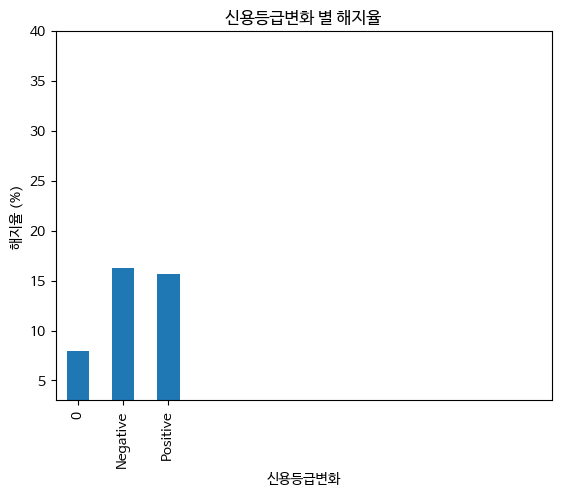

In [989]:
cross['rate'].plot.bar()
plt.title('신용등급변화 별 해지율')
plt.xlabel('신용등급변화')
plt.ylabel('해지율 (%)')

plt.xlim(-0.5, 10.5)
plt.ylim(3, 40)
cross.round(2).head(11)
plt.show()

# 신용등급의 변화에 따른 해지율

In [875]:
# 신용등급 변화 별로 그룹화
df['CRDT_GRAD_GROUP'] = '0' # 신용등급 변화가 없는 사람
df.loc[((df['CRDT_GRAD'] == 2) | (df['CRDT_GRAD'] == 1)), 'CRDT_GRAD_GROUP'] = '+2등급' # 신용등급이 2등급 오른사람
df.loc[((df['CRDT_GRAD'] == -2) | (df['CRDT_GRAD'] == -1)), 'CRDT_GRAD_GROUP'] = '-2등급' # 신용등급이 2등급 내려간사람
# df.loc[df['CRDT_GRAD'] == 1, 'CRDT_GRAD_GROUP'] = '+1등급' # 신용등급이 1등급 오른사람
# df.loc[df['CRDT_GRAD'] == -1, 'CRDT_GRAD_GROUP'] = '-1등급' # 신용등급이 1등급 내려간사람



# 결과 확인
print(df[['CRDT_GRAD', 'CRDT_GRAD_GROUP']].head())

   CRDT_GRAD CRDT_GRAD_GROUP
0          0               0
1          0               0
2          0               0
3          0               0
4          0               0


In [876]:
cross_tab = pd.crosstab(df['CRDT_GRAD_GROUP'], df['TERM/MAIN'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 200.76858026172664
p-값: 2.533125614217677e-44
자유도: 2
기대 빈도: [[2.45746211e+02 2.22537887e+01]
 [1.79358056e+03 1.62419443e+02]
 [8.98706732e+04 8.13832677e+03]]


In [877]:
cross_tab = pd.crosstab(index=df['CRDT_GRAD_GROUP'], columns = df['TERM/MAIN'])

In [878]:
cross_tab

TERM/MAIN,0,1
CRDT_GRAD_GROUP,,
+2등급,224,44
-2등급,1633,323
0,90053,7956


In [879]:
cross_tab['rate'] = cross_tab[1] / (cross_tab[0] + cross_tab[1]) * 100

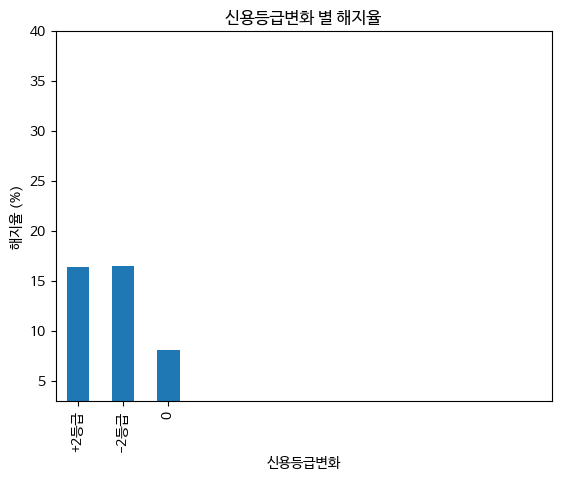

In [880]:
cross_tab['rate'].plot.bar()
plt.title('신용등급변화 별 해지율')
plt.xlabel('신용등급변화')
plt.ylabel('해지율 (%)')

plt.xlim(-0.5, 10.5)
plt.ylim(3, 40)
cross_tab.round(2).head(11)
plt.show()

In [827]:
# 등급이 2등급이 오른사람만 필터링해서 ㅑ

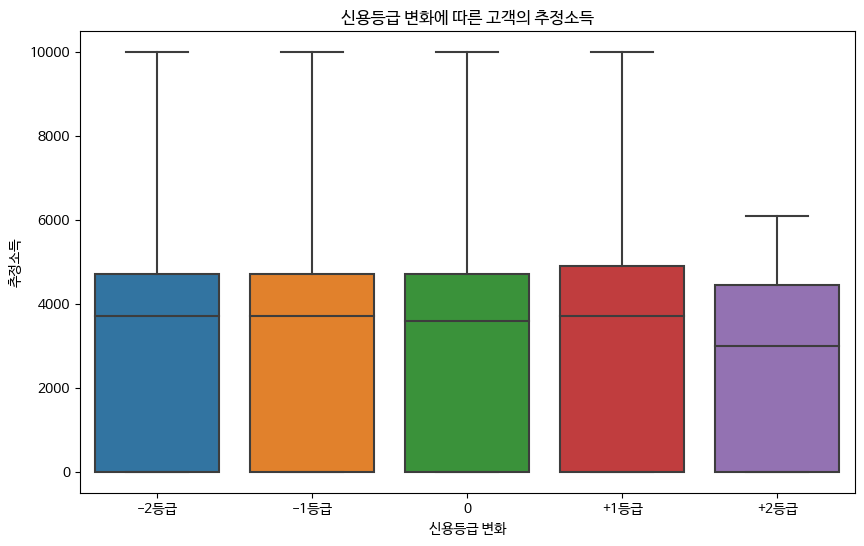

In [795]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CRDT_GRAD_GROUP', y='CUST_JOB_INCM', data=df, order=['-2등급', '-1등급', '0', '+1등급', '+2등급'])

plt.title('신용등급 변화에 따른 고객의 추정소득')
plt.xlabel('신용등급 변화')
plt.ylabel('추정소득')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CRDT_GRAD_GROUP', y='CUST_JOB_INCM', data=df, order=['-2등급', '-1등급', '0', '+1등급', '+2등급'])

plt.title('신용등급 변화에 따른 고객의 추정소득')
plt.xlabel('신용등급 변화')
plt.ylabel('추정소득')
plt.show()

In [797]:
df['ACTL_FMLY_NUM'].unique()

array([4., 2., 5., 3., 1., 6., 7., 8.])

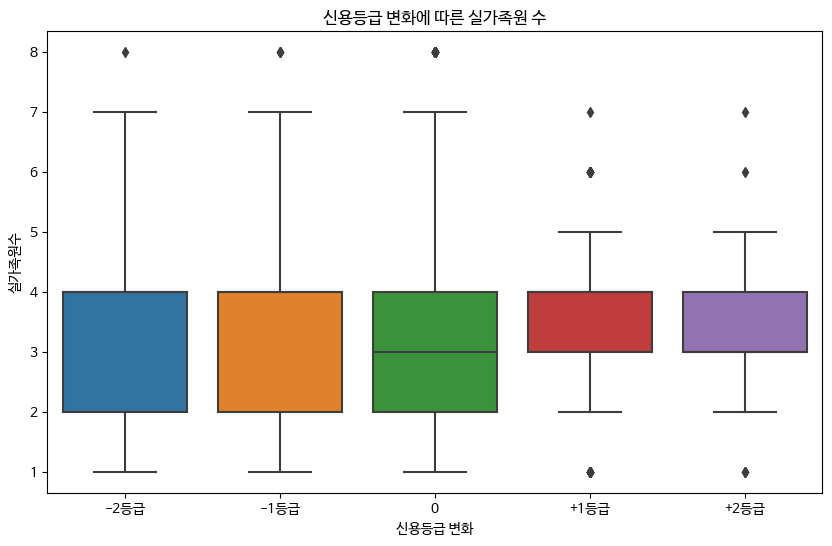

In [798]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CRDT_GRAD_GROUP', y='ACTL_FMLY_NUM', data=df, order=['-2등급', '-1등급', '0', '+1등급', '+2등급'])
plt.title('신용등급 변화에 따른 실가족원 수')
plt.xlabel('신용등급 변화')
plt.ylabel('실가족원수')
plt.show()

In [995]:
df.loc[df['CRDT_GRAD'] == 2, 'CRDT_GRAD_GROUP'] = '+2등급'

In [ ]:
df['CRDT_GRAD_GROUP'] == '+2등급'


In [996]:
filtered_df = df[df['CRDT_GRAD_GROUP'] == '+2등급']
cross = pd.crosstab(filtered_df['AGE_G'], filtered_df['TERM/MAIN'])

chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 471.7306456120558
p-값: 9.011262983013888e-92
자유도: 14
기대 빈도: [[8.98624206e+01 8.13757944e+00]
 [6.87722606e+01 6.22773937e+00]
 [1.56800754e+02 1.41992458e+01]
 [2.34742650e+02 2.12573504e+01]
 [3.93377331e+02 3.56226692e+01]
 [3.23688107e+02 2.93118933e+01]
 [3.14518472e+02 2.84815280e+01]
 [4.50229066e+02 4.07709337e+01]
 [7.96841260e+02 7.21587401e+01]
 [9.96739297e+02 9.02607026e+01]
 [8.78157581e+04 7.95224192e+03]
 [1.98981074e+02 1.80189259e+01]
 [4.67651372e+01 4.23486277e+00]
 [1.92562330e+01 1.74376702e+00]
 [3.66785390e+00 3.32146100e-01]]


In [997]:
filtered_df['AGE_G'].value_counts()

40대    27
50대    15
60대     7
20대     1
30대     1
Name: AGE_G, dtype: int64

In [1000]:
filtered_df

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,SEX,양육기,양육기간,TERM/MAIN,FAMILY_GROUP,직업재분류,AGE_G,TOTAL_LOAN_COUNT,CRDT_GRAD,CRDT_GRAD_GROUP
2278,2328,0,1,0,0,0,60001,60001,60001,0,...,2,양육기,11.0,1,2~4인가구,기술직 및 생산직,40대,1,2,+2등급
2465,2516,0,0,0,0,1,48001,48001,0,0,...,2,양육기 전,0.0,0,1인가구,사무직 및 관리직,40대,1,2,+2등급
3655,3727,0,1,0,0,0,9001,0,9001,0,...,2,양육기 후,1.0,1,5인이상가구,기술직 및 생산직,40대,1,2,+2등급
5844,5952,0,1,0,0,0,27001,0,27001,0,...,2,양육기 후,0.0,0,2~4인가구,사무직 및 관리직,60대,1,2,+2등급
7715,7867,0,1,2,2,0,15001,1,6001,6001,...,2,양육기 전,0.0,0,1인가구,서비스 및 판매직,40대,5,2,+2등급
7858,8013,0,1,0,1,1,66001,9001,57001,0,...,2,양육기 후,1.0,1,2~4인가구,기술직 및 생산직,50대,3,2,+2등급
15157,15454,1,0,0,1,1,1,1,0,0,...,2,양육기,11.0,1,2~4인가구,학생 및 비경제 활동/기타,40대,2,2,+2등급
16406,16733,0,1,0,0,0,3001,3001,3001,0,...,1,양육기 후,0.0,0,2~4인가구,서비스 및 판매직,60대,1,2,+2등급
16580,16909,0,2,0,0,0,93001,18001,93001,0,...,1,양육기 후,1.0,0,2~4인가구,학생 및 비경제 활동/기타,40대,2,2,+2등급
20088,20489,0,1,0,0,0,198001,0,198001,0,...,1,양육기,21.0,0,5인이상가구,고소득 전문직,50대,1,2,+2등급


In [999]:
cross['rate'] = cross[1] / (cross[0] + cross[1]) * 100

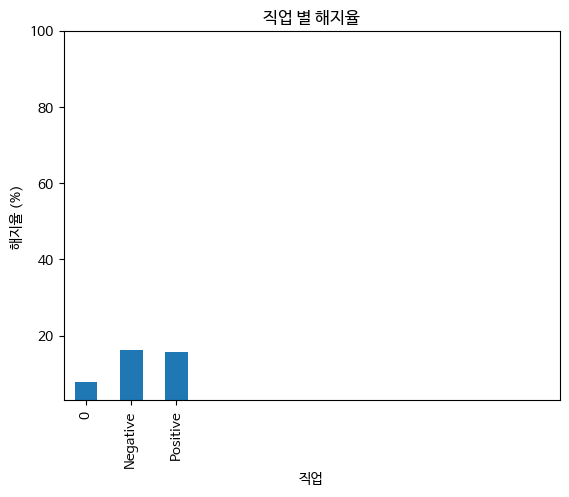

In [990]:
cross['rate'].plot.bar()
plt.title('직업 별 해지율')
plt.xlabel('직업')
plt.ylabel('해지율 (%)')

plt.xlim(-0.5, 10.5)
plt.ylim(3,100)
cross.round(2).head(11)
plt.show()

H0: 해지여부 별로 신용등급 변화간에 차이가 없다.
H1: 해지여부 별로 신용등급 변화간에 차이가 있다.???

In [417]:
cross_tab = pd.crosstab(df['TERM/MAIN'], df['CRDT_GRAD_GROUP'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 384.2516563235749
p-값: 3.637583726082389e-84
자유도: 2
기대 빈도: [[8.78157581e+04 2.68670298e+02 3.82557162e+03]
 [7.95224192e+03 2.43297018e+01 3.46428382e+02]]


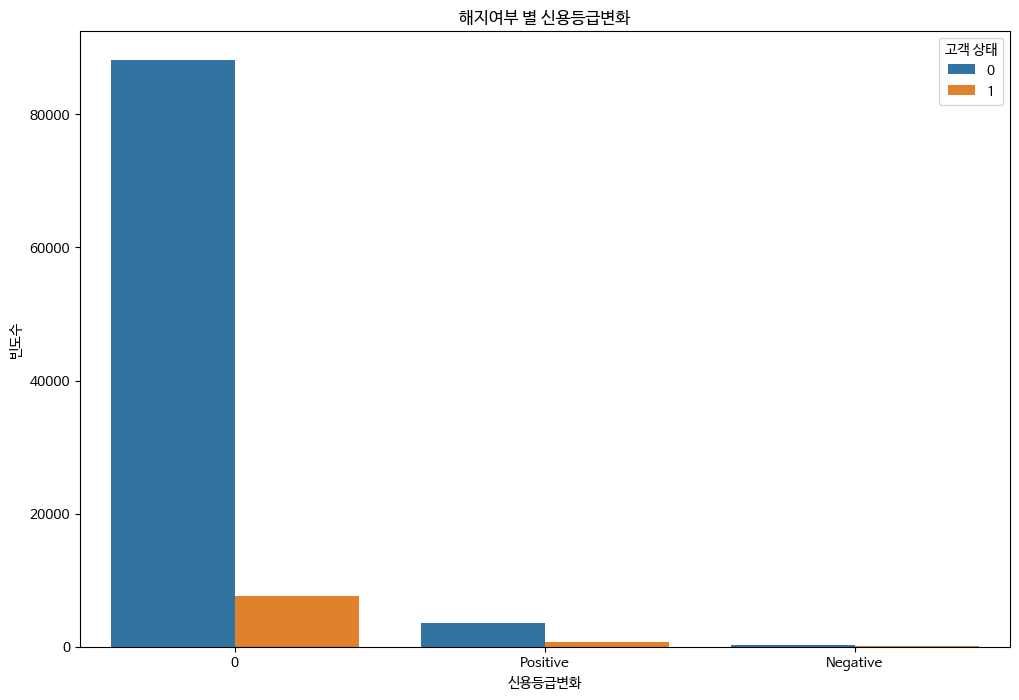

In [418]:
# 해지여부 별로 신용등급변화간의 그래프 그리기
plt.figure(figsize=(12, 8))
sns.countplot(x='CRDT_GRAD_GROUP', hue='TERM/MAIN', data=df)
plt.title('해지여부 별 신용등급변화')
plt.xlabel('신용등급변화')
plt.ylabel('빈도수')
plt.legend(title='고객 상태')
plt.show()

# 0: 유지, 1: 해지

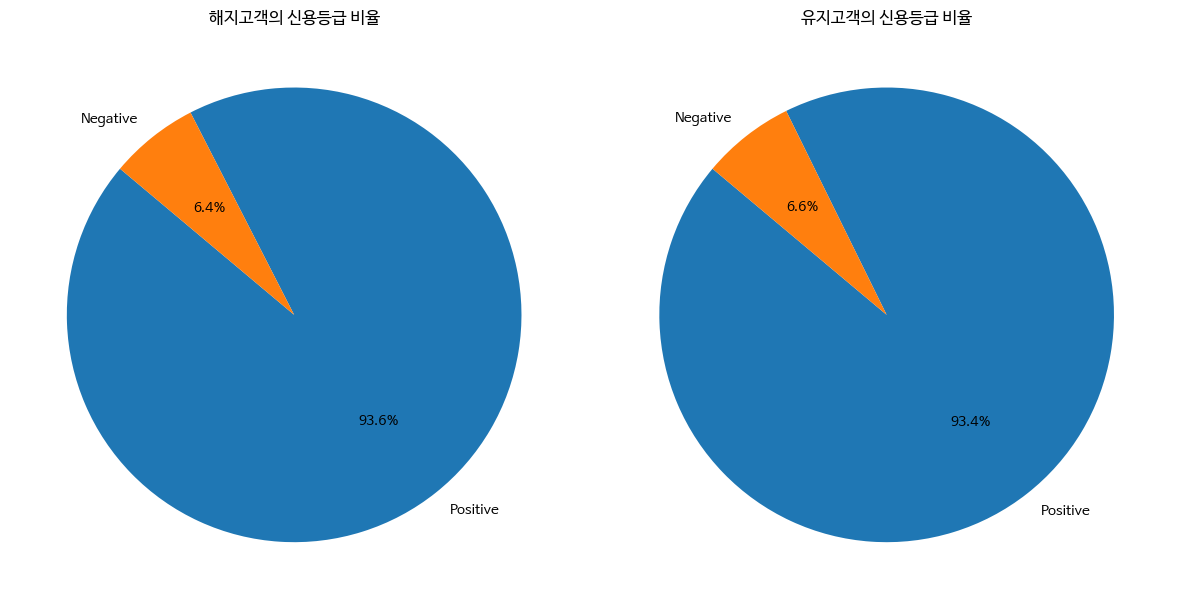

In [420]:
terminated_positive = len(df[(df['CRDT_GRAD_GROUP'] == 'Positive') & (df['TERM/MAIN'] == 1)])
terminated_negative = len(df[(df['CRDT_GRAD_GROUP'] == 'Negative') & (df['TERM/MAIN'] == 1)])
retained_positive = len(df[(df['CRDT_GRAD_GROUP'] == 'Positive') & (df['TERM/MAIN'] == 0)])
retained_negative = len(df[(df['CRDT_GRAD_GROUP'] == 'Negative') & (df['TERM/MAIN'] == 0)])

# 파이차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 해지고객의 Positive와 Negative 비율
axes[0].pie([terminated_positive, terminated_negative], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('해지고객의 신용등급 비율')

# 유지고객의 Positive와 Negative 비율
axes[1].pie([retained_positive, retained_negative], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('유지고객의 신용등급 비율')

plt.tight_layout()
plt.show()

### 신용등급의 변화에 따른 대출...?

## 보험료가 많을수록 해지고객이 증가하나..?
총납입보험료 or 최대보험료

<Axes: >

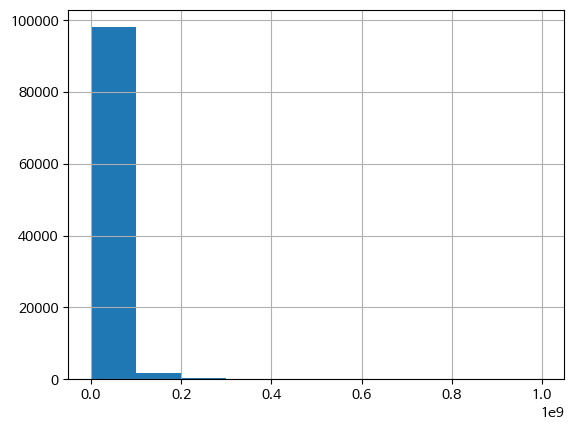

In [588]:
df['TOT_PREM'].hist()

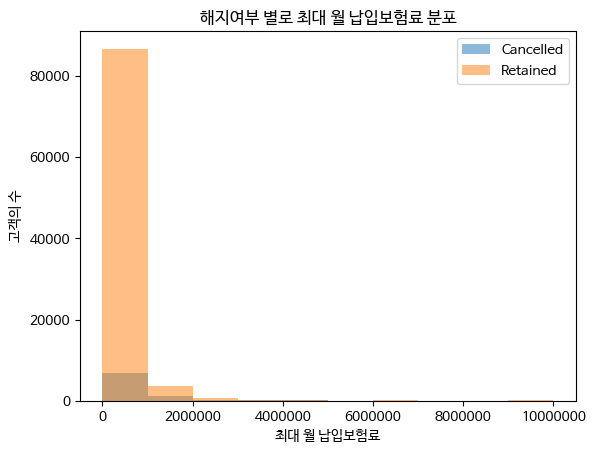

In [597]:
import matplotlib.ticker as ticker
# 'TERM/MAIN'에 따라 데이터 분리 
cancelled = df[(df['TERM/MAIN'] == 1)]
retained = df[(df['TERM/MAIN'] == 0)]

# 히스토그램 그리기
plt.hist(cancelled['MAX_MON_PREM'], alpha=0.5, label='Cancelled')
plt.hist(retained['MAX_MON_PREM'], alpha=0.5, label='Retained')

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xlabel('최대 월 납입보험료')
plt.ylabel('고객의 수')
plt.title('해지여부 별로 최대 월 납입보험료 분포')
plt.legend()
plt.show()

## 생명보험이 보험료가 높아 고객의 접근이 어렵다,,,
## 생명보험의 높은 금액대가 해지율의 잠재원인이라 생각하여 확인해보기---완료

H0: 해지여부별로 최대 월 납입보험료에 차이가 없다.

H1: 해지여부별로 최대 월 납입보험료에 차이가 있다.

In [ ]:
MAIN = df[df['TERM/MAIN']== 0]
TERM = df[df['TERM/MAIN']== 1]

In [599]:
from scipy import stats
# 정규성검정
statistic, p = stats.shapiro(MAIN['MAX_MON_PREM'])
print("statistic={}, p-value = {}".format(statistic, p))

statistic=0.4340982437133789, p-value = 0.0


In [600]:
# 만 위트니 U 검정 실행
u_stat, p_value = stats.mannwhitneyu(MAIN['MAX_MON_PREM'], TERM['MAX_MON_PREM'], alternative='two-sided')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 209698732.5
p-value: 0.0


해지여부별로 최대 월 납입보험료에 차이가 있다.


최대 월 보험료 별 해지고객 수

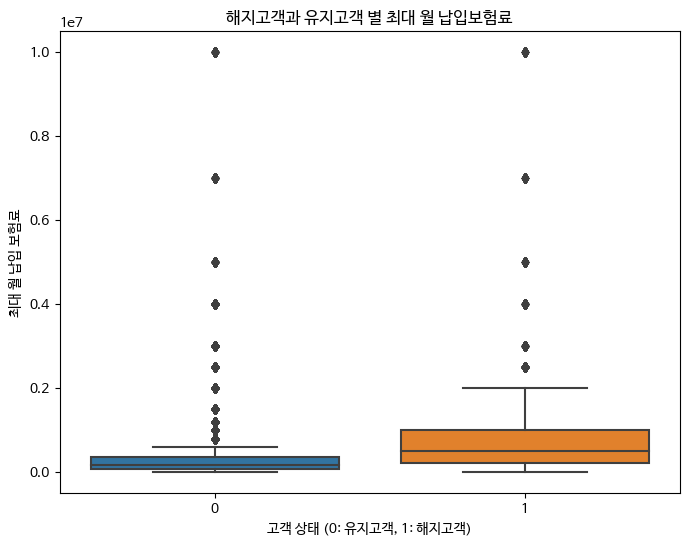

In [603]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'TERM/MAIN' 칼럼은 고객의 상태를 나타내며, 'STLN_REMN_AMT'는 약관대출받은 금액을 나타냅니다.
# 고객 상태가 '해지': 1, '유지': 0 또는 그와 유사한 방식으로 표현되어 있다고 가정합니다.

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x='TERM/MAIN', y='MAX_MON_PREM', data=df)

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.title('해지고객과 유지고객 별 최대 월 납입보험료')
plt.xlabel('고객 상태 (0: 유지고객, 1: 해지고객)')
plt.ylabel('최대 월 납입 보험료')
plt.show()

In [590]:
df['MAX_MON_PREM'].value_counts()

0           5744
490000      5011
40000       4909
190000      4632
230000      4561
790000      4517
300000      4256
30000       4242
590000      4191
50000       4121
260000      4114
340000      4006
60000       4000
390000      3616
100000      3507
110000      3495
70000       2803
200000      2630
990000      2506
80000       2442
120000      2436
160000      2421
130000      2359
150000      2340
140000      2290
90000       2286
1190000     1987
1490000     1557
1990000     1260
2490000      682
3990000      379
2990000      368
4990000      192
6990000      157
9990000       89
10000000      67
9999          60
Name: MAX_MON_PREM, dtype: int64

In [592]:
df['MAX_MON_PREM'].mean()

373421.4274739856

<Axes: >

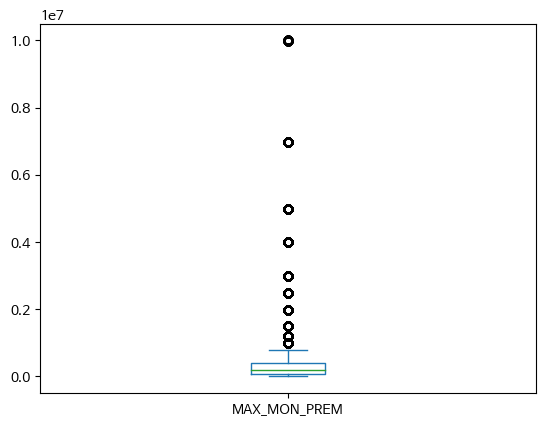

In [595]:
df['MAX_MON_PREM'].plot.box()

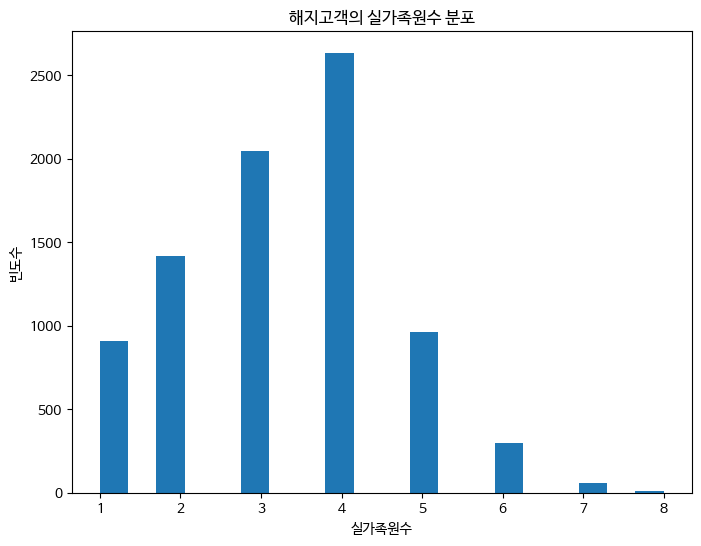

In [405]:
# 해지고객의 가족원수
import matplotlib.pyplot as plt

# 'ACTL_FMLY_NUM'는 실가족원 수를 나타내며, 'TERM/MAIN'은 고객의 상태를 나타냅니다.
# 고객 상태가 '해지': 1 또는 그와 유사한 방식으로 표현되어 있다고 가정합니다.

# 해지고객의 실가족원수에 대한 히스토그램 그리기
terminated_customers = df[df['TERM/MAIN'] == 1]  # 해지고객 필터링
plt.figure(figsize=(8, 6))
plt.hist(terminated_customers['ACTL_FMLY_NUM'].dropna(), bins=20)  # 결측값 제거 후 히스토그램
plt.title('해지고객의 실가족원수 분포')
plt.xlabel('실가족원수')
plt.ylabel('빈도수')
plt.show()



In [406]:
# NO_CUST_FMLY_NUM = 보험가입하지않은 가족원수
df['NO_CUST_FMLY_NUM'] = df['ACTL_FMLY_NUM'] - df['CUST_FMLY_NUM']

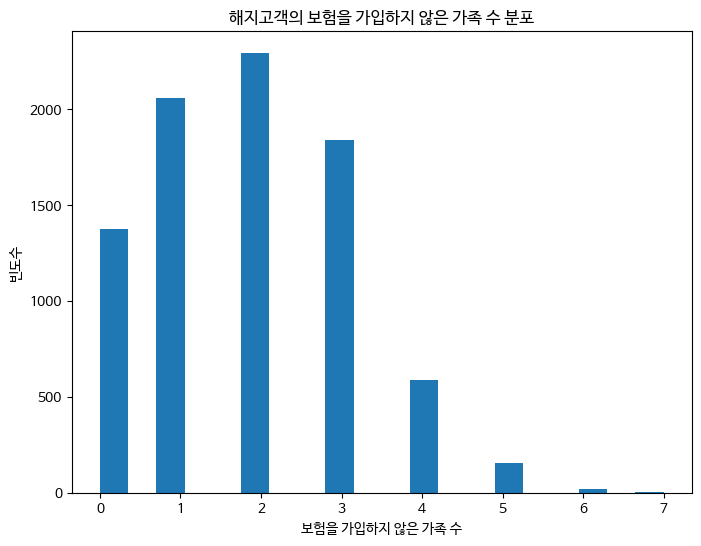

In [407]:
terminated_customers = df[df['TERM/MAIN'] == 1]  # 해지고객 필터링
plt.figure(figsize=(8, 6))
plt.hist(terminated_customers['NO_CUST_FMLY_NUM'].dropna(), bins=20)  # 결측값 제거 후 히스토그램
plt.title('해지고객의 보험을 가입하지 않은 가족 수 분포')
plt.xlabel('보험을 가입하지 않은 가족 수')
plt.ylabel('빈도수')
plt.show()

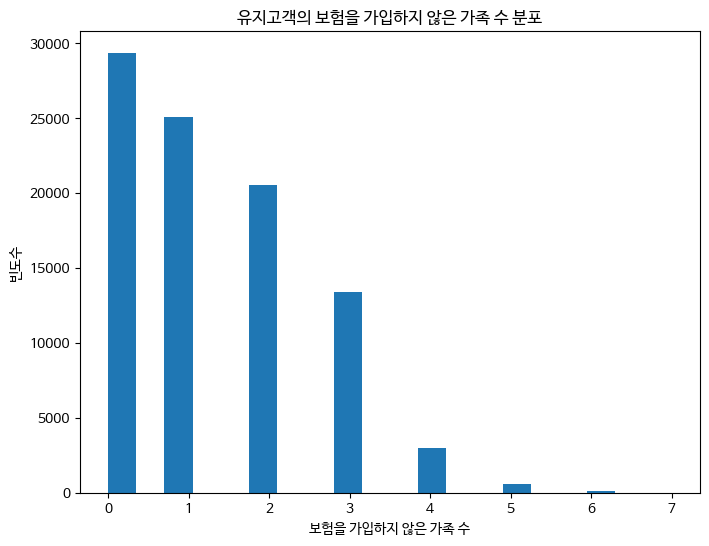

In [408]:
retained_customers = df[df['TERM/MAIN'] == 0]  # 유지고객 필터링
plt.figure(figsize=(8, 6))
plt.hist(retained_customers['NO_CUST_FMLY_NUM'].dropna(), bins=20)  # 결측값 제거 후 히스토그램
plt.title('유지고객의 보험을 가입하지 않은 가족 수 분포')
plt.xlabel('보험을 가입하지 않은 가족 수')
plt.ylabel('빈도수')
plt.show()

In [409]:
df['TERM/MAIN'].value_counts()
# 0: 유지고객
# 1: 해지고객

0    91910
1     8323
Name: TERM/MAIN, dtype: int64

<Axes: >

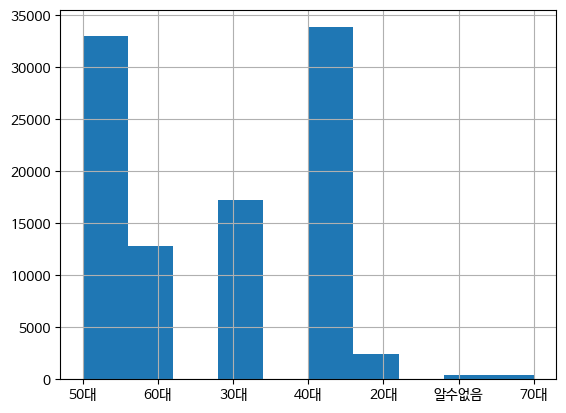

In [792]:
df['AGE_G'].hist()

최근 신용등급이랑 산출일 기준 총 신용대출금액, 산출일 기준 신용카드 발급 수 

## 해지여부와 자동이체 실패 월수 간의 차이 검정 - 카이제곱
# --완료(분석 1)

H0:자동이체 실패월수간에 해지여부 수에 차이가 없다.


H1:자동이체 실패월수간에 해지여부 수에 차이가 있다.

-> 유의확률 p값이 유의수준 0.05보다 작으므로 귀무가설기각, 해지여부 별로 자동이체 실패월수간에 차이가 있다. 

비율을 막대로 그려서 
이체비율 - 확뛴다
그 전에서 잡아야한다

In [851]:
cross_tab = pd.crosstab(df['AUTR_FAIL_MCNT'], df['TERM/MAIN'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 4825.283350928795
p-값: 0.0
자유도: 61
기대 빈도: [[5.93440422e+04 5.37395782e+03]
 [8.10687408e+03 7.34125917e+02]
 [4.54355402e+03 4.11445981e+02]
 [3.06724282e+03 2.77757176e+02]
 [2.29057476e+03 2.07425239e+02]
 [1.85960193e+03 1.68398072e+02]
 [1.51757455e+03 1.37425449e+02]
 [1.20764090e+03 1.09359103e+02]
 [1.06734549e+03 9.66545150e+01]
 [8.95873315e+02 8.11266848e+01]
 [7.50076123e+02 6.79238774e+01]
 [6.66632446e+02 6.03675536e+01]
 [5.86856624e+02 5.31433759e+01]
 [4.88741532e+02 4.42584678e+01]
 [4.47478176e+02 4.05218241e+01]
 [4.24554089e+02 3.84459110e+01]
 [3.46612194e+02 3.13878064e+01]
 [3.67702354e+02 3.32976465e+01]
 [3.18186326e+02 2.88136741e+01]
 [2.63168517e+02 2.38314826e+01]
 [2.38410504e+02 2.15894965e+01]
 [2.22822124e+02 2.01778755e+01]
 [2.34742650e+02 2.12573504e+01]
 [1.88894476e+02 1.71055241e+01]
 [1.64136462e+02 1.48635380e+01]
 [1.74223060e+02 1.57769397e+01]
 [1.40295412e+02 1.27045883e+01]
 [1.58634681e+02 1.43653188e+01]
 [1.19205252e+02 1

해지고객의 자동이체실패월수가 1일때가 가장 많으므로 실패를 하기전에 고객을 잡아야한다... 낮은 금액의 보험금 유치...?

모수, 카운팅

분모 분자수 이상..? 그래프 이렇게 안나옴 다시그려서 분석하기


In [852]:
df['AUTR_FAIL_MCNT'].value_counts()

0     64718
1      8841
2      4955
3      3345
4      2498
      ...  
55       27
54       27
56       22
57       22
58       19
Name: AUTR_FAIL_MCNT, Length: 62, dtype: int64

자동이체 실패월수간에 해지여부 비율에 차이가 없다.(해지고객 수에 차이가 없다..?)
자동이체 실패월수간에 해지여부 비율에 차이가 있다.

-> 유의확률 p값이 유의수준 0.05보다 작으므로 귀무가설기각, 자동이체 실패월수간에 해지여부 비율에 차이가 있다. 

In [853]:
# 카이제곱 검정 수행
cross_tab = pd.crosstab(df['AUTR_FAIL_MCNT'], df['TERM/MAIN'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

Chi-square 통계량: 4825.283350928795
p-값: 0.0
자유도: 61
기대 빈도: [[5.93440422e+04 5.37395782e+03]
 [8.10687408e+03 7.34125917e+02]
 [4.54355402e+03 4.11445981e+02]
 [3.06724282e+03 2.77757176e+02]
 [2.29057476e+03 2.07425239e+02]
 [1.85960193e+03 1.68398072e+02]
 [1.51757455e+03 1.37425449e+02]
 [1.20764090e+03 1.09359103e+02]
 [1.06734549e+03 9.66545150e+01]
 [8.95873315e+02 8.11266848e+01]
 [7.50076123e+02 6.79238774e+01]
 [6.66632446e+02 6.03675536e+01]
 [5.86856624e+02 5.31433759e+01]
 [4.88741532e+02 4.42584678e+01]
 [4.47478176e+02 4.05218241e+01]
 [4.24554089e+02 3.84459110e+01]
 [3.46612194e+02 3.13878064e+01]
 [3.67702354e+02 3.32976465e+01]
 [3.18186326e+02 2.88136741e+01]
 [2.63168517e+02 2.38314826e+01]
 [2.38410504e+02 2.15894965e+01]
 [2.22822124e+02 2.01778755e+01]
 [2.34742650e+02 2.12573504e+01]
 [1.88894476e+02 1.71055241e+01]
 [1.64136462e+02 1.48635380e+01]
 [1.74223060e+02 1.57769397e+01]
 [1.40295412e+02 1.27045883e+01]
 [1.58634681e+02 1.43653188e+01]
 [1.19205252e+02 1

In [861]:
cross_tab.head(7)

TERM/MAIN,0,1,rate
AUTR_FAIL_MCNT,,,
0,61438,3280,5.068142
1,8155,686,7.759303
2,4448,507,10.232089
3,2960,385,11.509716
4,2183,315,12.610088
5,1771,257,12.672584
6,1412,243,14.682779


In [858]:
cross_tab['rate'] = cross_tab[1] / (cross_tab[0] + cross_tab[1]) * 100

In [860]:
cross_tab['rate'].head(7)

AUTR_FAIL_MCNT
0      5.068142
1      7.759303
2     10.232089
3     11.509716
4     12.610088
        ...    
57    36.363636
58    63.157895
59    41.379310
60    30.232558
61    48.275862
Name: rate, Length: 62, dtype: float64

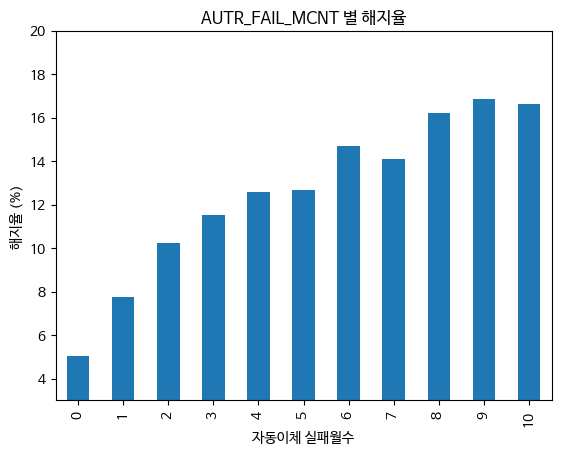

In [859]:
cross_tab['rate'].plot.bar()
plt.title('AUTR_FAIL_MCNT 별 해지율')
plt.xlabel('자동이체 실패월수')
plt.ylabel('해지율 (%)')

plt.xlim(-0.5, 10.5)
plt.ylim(3, 20)
cross_tab.round(2).head(11)
plt.show()

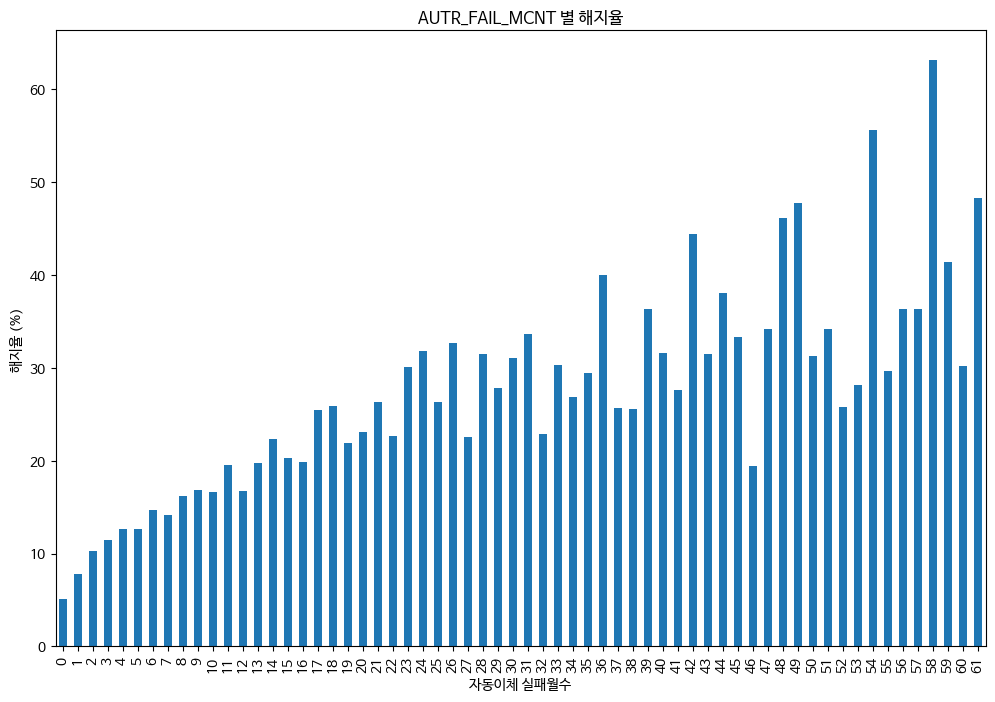

In [549]:
plt.figure(figsize=(12, 8))
cross['rate'].plot(kind='bar')
plt.title('AUTR_FAIL_MCNT 별 해지율')
plt.xlabel('자동이체 실패월수')
plt.ylabel('해지율 (%)')
plt.show()

AUTR_FAIL_MCNT,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
TERM/MAIN,,,,,,,,,,,,,,,,,,,,,
0,61438.00,8155.00,4448.00,2960.00,2183.00,1771.00,1412.00,1131.00,975.00,812.00,...,23.00,23.00,12.00,19.00,14.00,14.00,7.00,17.00,30.00,15.00
1,3280.00,686.00,507.00,385.00,315.00,257.00,243.00,186.00,189.00,165.00,...,8.00,9.00,15.00,8.00,8.00,8.00,12.00,12.00,13.00,14.00
rate,5.07,7.76,10.23,11.51,12.61,12.67,14.68,14.12,16.24,16.89,...,25.81,28.12,55.56,29.63,36.36,36.36,63.16,41.38,30.23,48.28


In [551]:
df['AUTR_FAIL_MCNT'].value_counts().head(10)

0    64718
1     8841
2     4955
3     3345
4     2498
5     2028
6     1655
7     1317
8     1164
9      977
Name: AUTR_FAIL_MCNT, dtype: int64

## 연령대별 추정소득

In [470]:
import scipy.stats as stats

# 'AGE_G'가 '20대'이고 'CUST_JOB_INCM'이 0이 아닌 데이터 필터링
filtered_data = df[(df['AGE_G'] == '20대') & (df['CUST_JOB_INCM'] != 0)]

# Shapiro-Wilk 검정 수행
statistic, p = stats.shapiro(filtered_data['CUST_JOB_INCM'])
print('statistic = {}, p-value = {}'.format(statistic, p))

statistic = 0.8127013444900513, p-value = 7.897401451481732e-38


정규성을 따르지않기 때문에 비모수검정인 Kruskal-Wallis H-test 검정을 수행한다.

In [474]:
# 필터링: CUST_JOB_INCM이 0이 아니고, AGE_G가 '알수없음'이 아닌 데이터만 선택
filtered_df = df[(df['CUST_JOB_INCM'] != 0) & (df['AGE_G'] != '알수없음')]

# 'AGE_G'별로 'CUST_JOB_INCM' 데이터를 그룹화
groups = [group['CUST_JOB_INCM'].values for name, group in filtered_df.groupby('AGE_G') if not group['CUST_JOB_INCM'].empty]

# Kruskal-Wallis H-test (비모수 검정) 수행
statistic, p = stats.kruskal(*groups)
print('statistic = {}, p-value = {}'.format(statistic, p))

statistic = 7565.700906524935, p-value = 0.0


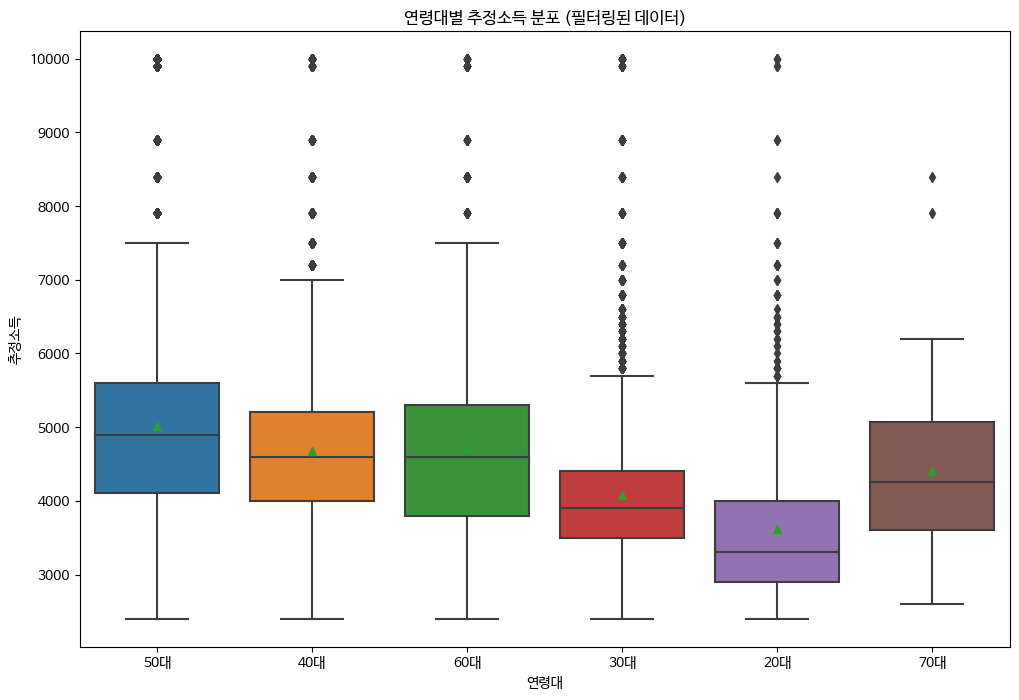

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns



# 필터링: AGE_G가 '알수없음'이 아니고, CUST_JOB_INCM이 0이 아닌 데이터만 선택
filtered_df = df[(df['AGE_G'] != '알수없음') & (df['CUST_JOB_INCM'] != 0)]

# 연령대별 추정소득 박스플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='AGE_G', y='CUST_JOB_INCM', data=filtered_df, showmeans=True)
plt.title('연령대별 추정소득 분포 (필터링된 데이터)')
plt.xlabel('연령대')
plt.ylabel('추정소득')
plt.show()

=> 연령대 별로 추정소득에 차이가 있으며 40대와 50대의 추정소득이 많은 것을 알 수 있다.

# 연령대별 타사/자사 신용대출금액 분포

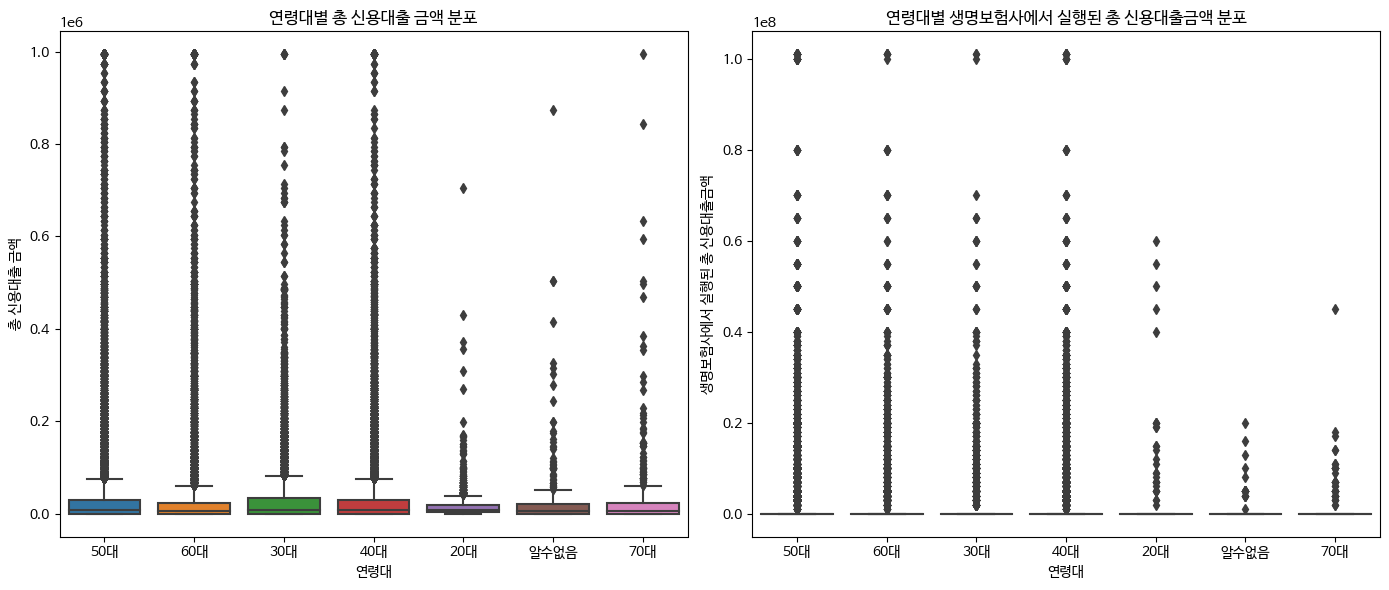

In [793]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.
# 'AGE_G', 'TOT_CLIF_AMT', 'TOT_CRLN_AMT' 칼럼이 있다고 가정합니다.

# 연령대별 TOT_CLIF_AMT 분포
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AGE_G', y='TOT_CLIF_AMT', data=df)
plt.title('연령대별 총 신용대출 금액 분포')
plt.xlabel('연령대')
plt.ylabel('총 신용대출 금액')

# 연령대별 TOT_CRLN_AMT 분포
plt.subplot(1, 2, 2)
sns.boxplot(x='AGE_G', y='TOT_CRLN_AMT', data=df)
plt.title('연령대별 생명보험사에서 실행된 총 신용대출금액 분포')
plt.xlabel('연령대')
plt.ylabel('생명보험사에서 실행된 총 신용대출금액')

plt.tight_layout()
plt.show()


In [475]:
# # 필터링: CUST_JOB_INCM이 0이 아니고, AGE_G가 '알수없음'이 아닌 데이터만 선택
# filtered_df = df[(df['CUST_JOB_INCM'] != 0) & (df['AGE_G'] != '알수없음')]

# # 아노바 검정 수행
# anova_result = stats.f_oneway(*[group['CUST_JOB_INCM'].values for name, group in filtered_df.groupby('AGE_G')])

# # 결과 출력
# print("ANOVA 검정 결과")
# print("F 통계량:", anova_result.statistic)
# print("p-값:", anova_result.pvalue)

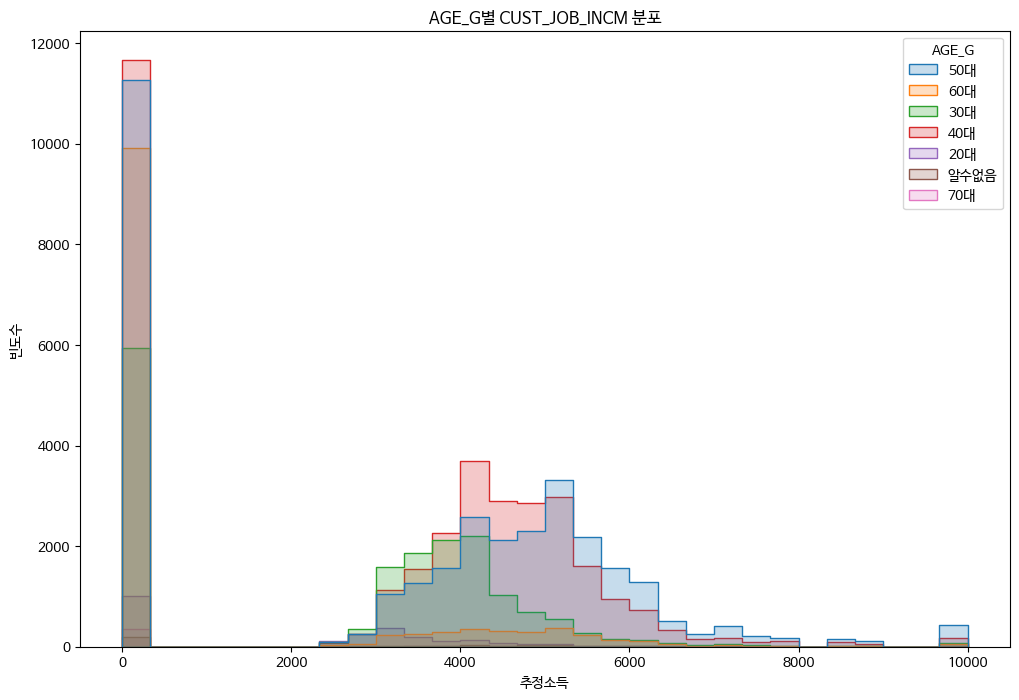

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# 연령대별로 추정소득 히스토그램 그리기
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='CUST_JOB_INCM', hue='AGE_G', element='step', bins=30)
plt.title('AGE_G별 CUST_JOB_INCM 분포')
plt.xlabel('추정소득')
plt.ylabel('빈도수')
plt.show()


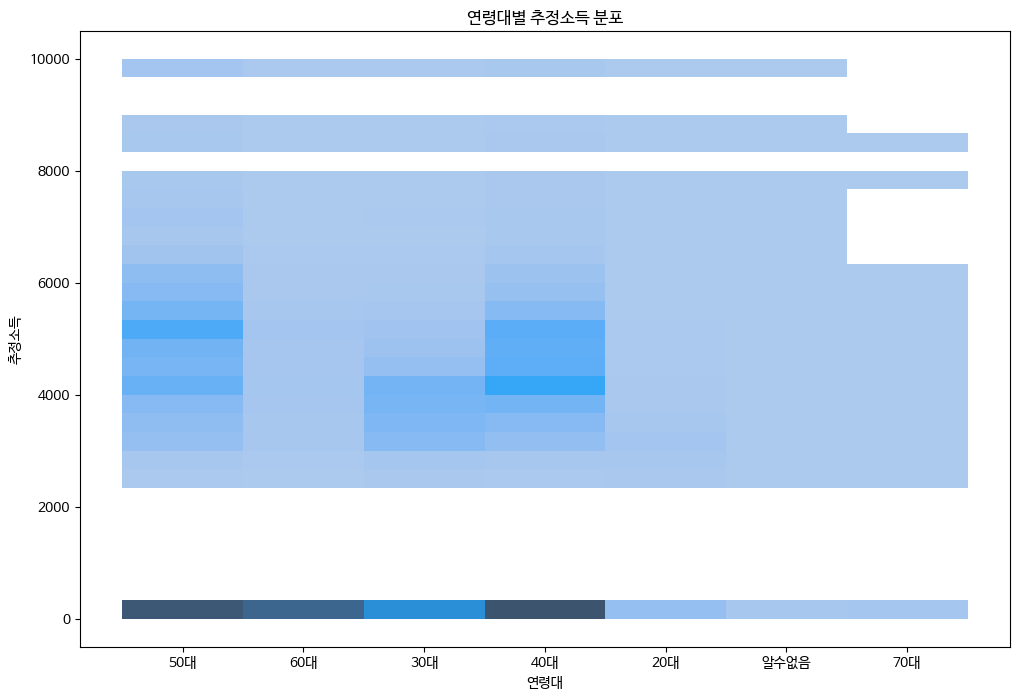

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns


# 연령대별 추정소득 히스토그램 그리기
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='AGE_G', y='CUST_JOB_INCM', bins=30)
plt.title('연령대별 추정소득 분포')
plt.xlabel('연령대')
plt.ylabel('추정소득')
plt.show()



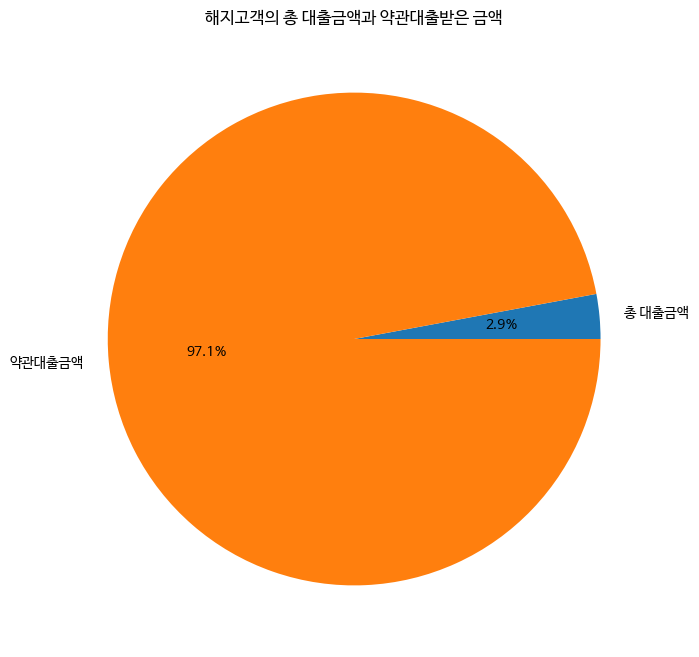

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.
# 'customer_status'는 고객의 상태 (해지: 1, 유지: 0)를 나타내는 열이라고 가정합니다.
# 'TOT_LNIF_AMT'는 총 대출금액을, 'STLN_REMN_AMT'는 약관대출받은 금액을 나타냅니다.

# 해지고객의 총 대출금액과 약관대출받은 금액의 평균 계산
terminated_loan_mean = terminated_customers['TOT_LNIF_AMT'].mean()
terminated_policy_loan_mean = terminated_customers['STLN_REMN_AMT'].mean()

# 파이차트 그리기
plt.figure(figsize=(8, 8))
plt.pie([terminated_loan_mean, terminated_policy_loan_mean], labels=['총 대출금액', '약관대출금액'], autopct='%1.1f%%')
plt.title('해지고객의 총 대출금액과 약관대출받은 금액')
plt.show()


#### 추정소득 구간화

<Axes: >

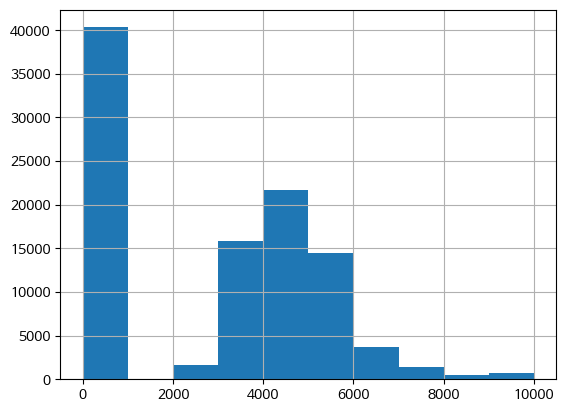

In [222]:
df['CUST_JOB_INCM'].hist()

In [ ]:
# 추정소득
df['CUST_JOB_INCM'].value_counts().sort_index()

--------------------------------------------------

## 직업 구간화

In [ ]:
#특정 열 이름
column_name = 'OCCP_NAME_G'
#해당 열 추출
occupation_column = df_merge[column_name]
def classify_occupation(occupation):
    if occupation in ['기업/단체 임원', '고소득 전문직', '전문직']:
        return '전문직 및 고소득 직종'
    elif occupation in ['단순 사무직', '사무직']:
        return '사무직'
    elif occupation in ['자영업']:
        return '자영업'
    elif occupation in ['예체능계 종사자']:
        return '예체능계 종사자'
    elif occupation in ['1차산업 종사자', '2차산업 종사자', '3차산업 종사자']:
        return '산업 종사자'
    elif occupation == ['단순 노무직', '운전직']:
        return '단순 노무직'
    elif occupation == '공무원':
        return '공무원'
    else:
        return '비경제 활동/기타'
# 'OCCP_NAME_G' 컬럼을 바탕으로 새로운 '직업재분류' 컬럼 생성
df_merge['직업재분류'] = df_merge['OCCP_NAME_G'].apply(classify_occupation)
# 새로운 분류를 저장할 컬럼 추가
df_merge['직업재분류'] = occupation_column.apply(classify_occupation)
# 결과 확인
print(df_merge[['OCCP_NAME_G', '직업재분류']])

주부, 사무직, 2차산업종사자, 자영업, 3차산업종사자, 공무원, 전문직, 단순사무직, 학생, 운전직, 기타, 무응답, 고소득전문직, 1차산업종사자,  예체능계 종사자, 단순노무직

전문직 및 고소득 직종: 기업/단체임원, 고소득 전문직


신용등급의 변화에 따른 대출

소득급여 나누기-그룹화

애기가 있는 곳에 상품개발

## 소득 결측치 채우기

결측 있는 값이 10%나 있기 때문에 결측치를 대체하면 데이터에 큰 영향을 줄 것이라 생각되어 분석을 할 때는 0이 아닌 것들을 가지고 분석하기로 결정함.

In [338]:
# 'OCCP_NAME_G' 칼럼의 값들을 리스트로 변환
job = df['OCCP_NAME_G'].unique().tolist()

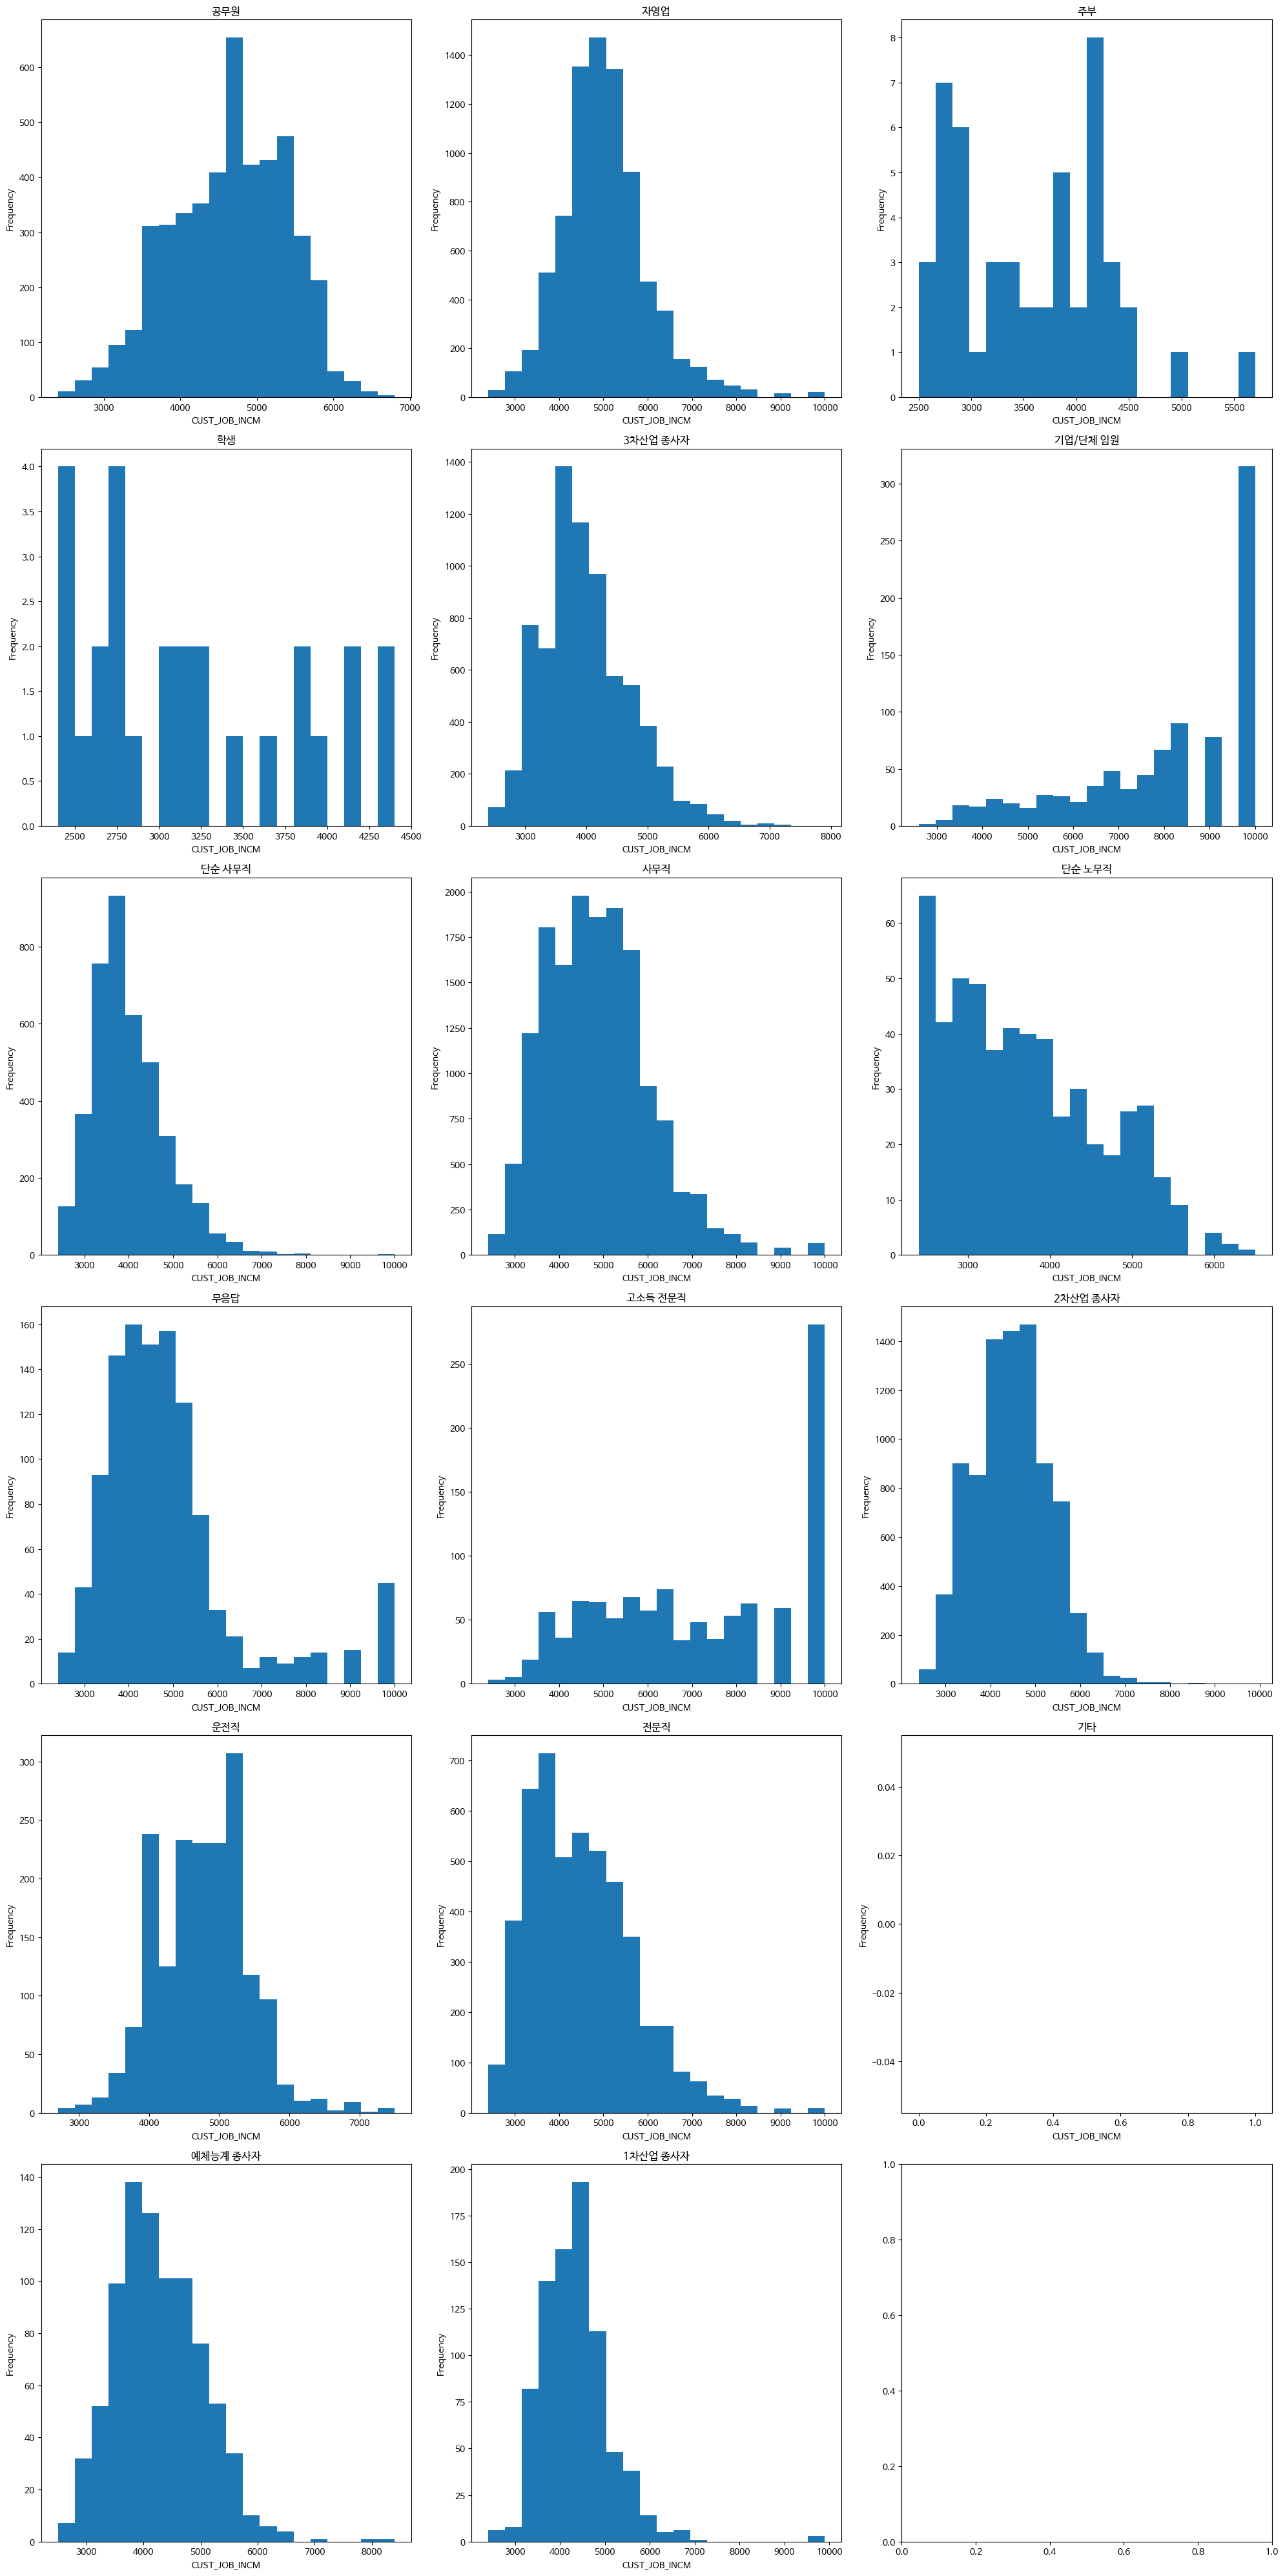

In [339]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 3, figsize=(20, 40)) 

# 각 직업별로 히스토그램 그리기
for i, ax in zip(job, axes.flatten()):
    filtered_data = df[(df['OCCP_NAME_G'] == i) & (df['CUST_JOB_INCM'] != 0)]
    ax.hist(filtered_data['CUST_JOB_INCM'], bins=20)
    ax.set_title(i)
    ax.set_xlabel('CUST_JOB_INCM')
    ax.set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [348]:
# 'CUST_JOB_INCM'이 0이 아닌 데이터 필터링 후 그룹화하고 평균 및 중앙값 계산
result = df[df['CUST_JOB_INCM'] != 0].groupby('OCCP_NAME_G')['CUST_JOB_INCM'].agg(['mean', 'median']).round(2)

# 결과 출력
print(result)


                mean  median
OCCP_NAME_G                 
1차산업 종사자     4335.26  4300.0
2차산업 종사자     4463.32  4500.0
3차산업 종사자     3981.15  3900.0
고소득 전문직      7106.82  7000.0
공무원          4624.67  4700.0
기업/단체 임원     7999.55  8400.0
단순 노무직       3710.20  3600.0
단순 사무직       4004.74  3900.0
무응답          4876.15  4600.0
사무직          4858.78  4800.0
예체능계 종사자     4253.33  4200.0
운전직          4752.68  4800.0
자영업          5013.32  4900.0
전문직          4482.57  4300.0
주부           3573.47  3600.0
학생           3144.44  3000.0


In [340]:
df.groupby('OCCP_NAME_G')['CUST_JOB_INCM'].agg(['mean', 'median']).round(2)

,mean,median
OCCP_NAME_G,,
1차산업 종사자,2995.67,3800.0
2차산업 종사자,4014.71,4300.0
3차산업 종사자,3492.35,3700.0
고소득 전문직,6223.55,6300.0
공무원,4189.55,4600.0
기업/단체 임원,6808.45,7900.0
기타,0.00,0.0
단순 노무직,2435.81,2900.0
단순 사무직,3947.21,3900.0


In [219]:
import pandas as pd

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.

# 직업이 '기타'인 사람들의 소득 값 추출
income_of_others = df[df['OCCP_NAME_G'] == '기타']['CUST_JOB_INCM']

# 결과 출력
print(income_of_others)


94        0
105       0
120       0
279       0
366       0
         ..
99940     0
99977     0
99998     0
100000    0
100163    0
Name: CUST_JOB_INCM, Length: 1672, dtype: int64


In [220]:
income_of_others.value_counts()

### 직업이 기타인 사람의 소득이 0....

0    1672
Name: CUST_JOB_INCM, dtype: int64

In [169]:
## 직업별로 소득의 값...


unique_income_by_job = df.groupby('OCCP_NAME_G')['CUST_JOB_INCM'].unique()

# 결과 출력
print(unique_income_by_job)

OCCP_NAME_G
1차산업 종사자    [0, 4100, 5000, 3300, 5600, 3800, 4300, 4500, ...
2차산업 종사자    [4800, 5600, 5300, 4200, 3800, 3400, 4900, 520...
3차산업 종사자    [4400, 4300, 3500, 3600, 3900, 4800, 0, 4000, ...
고소득 전문직     [8400, 0, 7000, 4300, 3600, 5900, 4200, 5100, ...
공무원         [5400, 4800, 5200, 4300, 5300, 0, 4200, 5600, ...
기업/단체 임원    [0, 10000, 5500, 6500, 6400, 6100, 8400, 3500,...
기타                                                        [0]
단순 노무직      [3600, 3300, 0, 3800, 3500, 4500, 2700, 2900, ...
단순 사무직      [4700, 3900, 3000, 4600, 5300, 6000, 4900, 260...
무응답         [3700, 0, 4300, 5100, 8900, 4100, 4200, 3100, ...
사무직         [4700, 3900, 0, 6000, 4100, 6500, 4200, 4500, ...
예체능계 종사자    [4100, 3500, 5600, 4400, 4200, 5900, 4500, 390...
운전직         [4100, 5300, 5400, 6800, 3800, 0, 3700, 5200, ...
자영업         [5500, 5900, 5800, 3800, 4300, 4700, 5200, 620...
전문직         [5300, 3800, 3300, 5700, 5400, 4000, 6000, 260...
주부          [0, 2600, 3800, 4200, 3900, 2500, 2700, 3700, 

In [171]:
## 소득이 0인 값의 직업들


import pandas as pd

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.

# 소득이 0인 행들 필터링
income_zero = df[df['CUST_JOB_INCM'] == 0]

# 필터링된 행들의 직업 추출
jobs_with_zero_income = income_zero['OCCP_NAME_G']

# 결과 출력
print(jobs_with_zero_income)


2               주부
3               학생
6               주부
7         기업/단체 임원
8               주부
            ...   
100213         자영업
100215          학생
100218          주부
100219          주부
100223          주부
Name: OCCP_NAME_G, Length: 40338, dtype: object


In [345]:
jobs_with_zero_income.value_counts()

주부          27516
학생           3808
기타           1672
자영업          1525
사무직          1140
3차산업 종사자     1016
2차산업 종사자      965
무응답           521
공무원           479
1차산업 종사자      364
운전직           355
단순 노무직        282
전문직           235
기업/단체 임원      155
고소득 전문직       152
예체능계 종사자       94
단순 사무직         59
Name: OCCP_NAME_G, dtype: int64

In [175]:
jobs_with_zero_income.unique()

array(['주부', '학생', '기업/단체 임원', '무응답', '사무직', '3차산업 종사자', '기타', '단순 노무직',
       '공무원', '고소득 전문직', '2차산업 종사자', '1차산업 종사자', '운전직', '자영업', '전문직',
       '단순 사무직', '예체능계 종사자'], dtype=object)

In [291]:
import pandas as pd

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.

# '1차산업종사자'의 소득 평균값 계산
mean_income_primary = df[(df['OCCP_NAME_G'] == '1차산업 종사자') & (df['CUST_JOB_INCM'] != 0)]['CUST_JOB_INCM'].mean().round(1)

# 소득이 0인 '1차산업종사자'의 소득을 평균값으로 채움
df.loc[(df['OCCP_NAME_G'] == '1차산업 종사자') & (df['CUST_JOB_INCM'] == 0), 'CUST_JOB_INCM'] = mean_income_primary

# 결과 확인
df[df['OCCP_NAME_G'] == '1차산업 종사자']



,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,TERM/MAIN
170,172,0,1,0,0,0,9001,9001,9001,0,...,0,0,500000,0,0,60,1,0,0.0,0
176,178,0,1,0,0,1,3001,3001,3001,0,...,0,0,6300000,7,0,25,2,1,16.0,0
306,310,0,1,0,0,0,9001,9001,9001,0,...,0,0,900000,8,0,60,2,0,1.0,0
615,623,0,1,0,0,0,3001,3001,3001,0,...,0,0,0,0,0,60,2,0,0.0,0
735,747,0,0,0,1,1,33001,33001,0,0,...,0,6,0,0,0,40,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99597,101606,0,1,0,0,0,99001,99001,99001,0,...,0,0,300000,3,0,35,1,0,0.0,0
99652,101661,1,0,0,1,1,150001,0,0,0,...,0,0,0,0,0,50,1,0,0.0,0
99695,101704,0,2,0,0,0,108001,27001,108001,0,...,0,1,500000,0,0,55,1,0,0.0,1
99869,101881,0,1,0,0,0,111001,0,111001,0,...,0,9,700000,4,4,60,2,0,0.0,0


In [294]:
mean_income_primary

4335.3

In [292]:
## 직업별로 소득의 값...


unique_income_by_job = df.groupby('OCCP_NAME_G')['CUST_JOB_INCM'].unique()

# 결과 출력
print(unique_income_by_job)

OCCP_NAME_G
1차산업 종사자    [4335.257985257986, 4100.0, 5000.0, 3300.0, 56...
2차산업 종사자    [4800.0, 5600.0, 5300.0, 4200.0, 3800.0, 3400....
3차산업 종사자    [4400.0, 4300.0, 3500.0, 3600.0, 3900.0, 4800....
고소득 전문직     [8400.0, 0.0, 7000.0, 4300.0, 3600.0, 5900.0, ...
공무원         [5400.0, 4800.0, 5200.0, 4300.0, 5300.0, 0.0, ...
기업/단체 임원    [0.0, 10000.0, 5500.0, 6500.0, 6400.0, 6100.0,...
기타                                                      [0.0]
단순 노무직      [3600.0, 3300.0, 0.0, 3800.0, 3500.0, 4500.0, ...
단순 사무직      [4700.0, 3900.0, 3000.0, 4600.0, 5300.0, 6000....
무응답         [3700.0, 0.0, 4300.0, 5100.0, 8900.0, 4100.0, ...
사무직         [4700.0, 3900.0, 0.0, 6000.0, 4100.0, 6500.0, ...
예체능계 종사자    [4100.0, 3500.0, 5600.0, 4400.0, 4200.0, 5900....
운전직         [4100.0, 5300.0, 5400.0, 6800.0, 3800.0, 0.0, ...
자영업         [5500.0, 5900.0, 5800.0, 3800.0, 4300.0, 4700....
전문직         [5300.0, 3800.0, 3300.0, 5700.0, 5400.0, 4000....
주부          [0.0, 2600.0, 3800.0, 4200.0, 3900.0, 2500.0, 

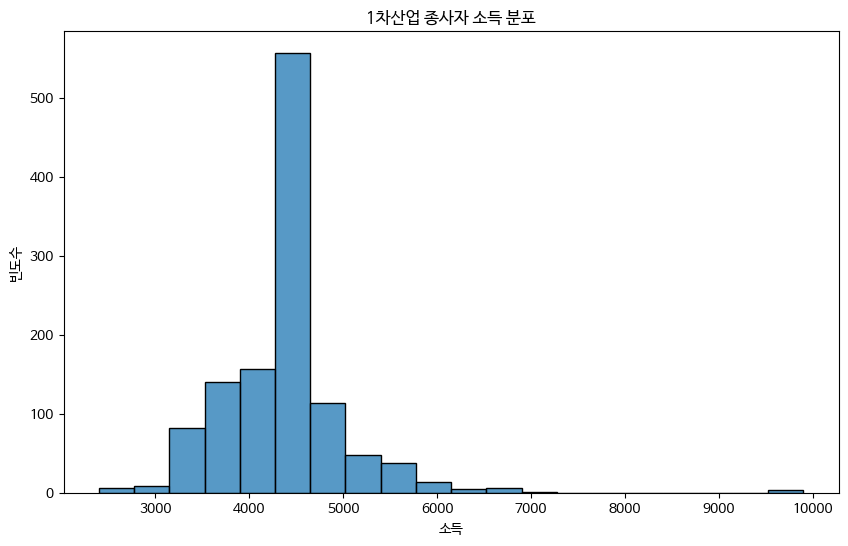

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 예시
# 여기서는 df를 사용한다고 가정합니다.

# '1차산업종사자'만 필터링
primary_industry = df[df['OCCP_NAME_G'] == '1차산업 종사자']

# 히스토그램 그리기
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
sns.histplot(primary_industry['CUST_JOB_INCM'], kde=False, bins=20) # 히스토그램 생성, KDE는 제외, 막대 개수는 20개

plt.title('1차산업 종사자 소득 분포') # 그래프 제목
plt.xlabel('소득') # X축 라벨
plt.ylabel('빈도수') # Y축 라벨

# 그래프 표시
plt.show()


#### 실가족원수

<Axes: >

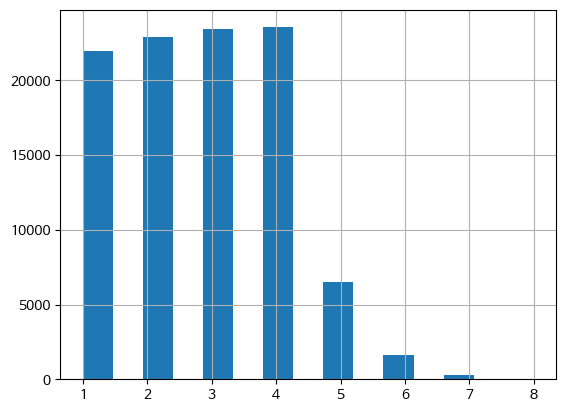

In [225]:
df['ACTL_FMLY_NUM'].hist(bins=15)

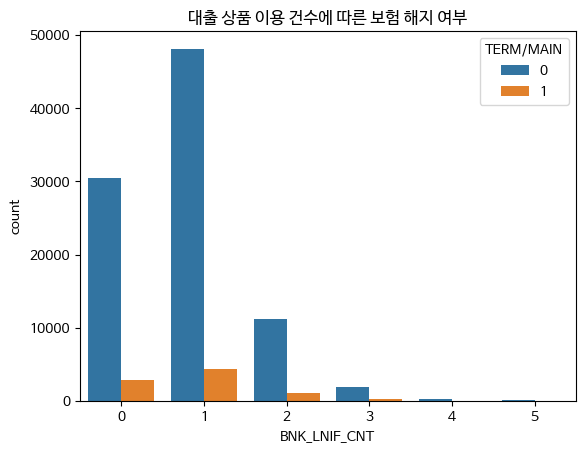

In [103]:
sns.countplot(x='BNK_LNIF_CNT', hue='TERM/MAIN', data=df)
plt.title('대출 상품 이용 건수에 따른 보험 해지 여부')
plt.show()

# 해지: 1 유지: 0

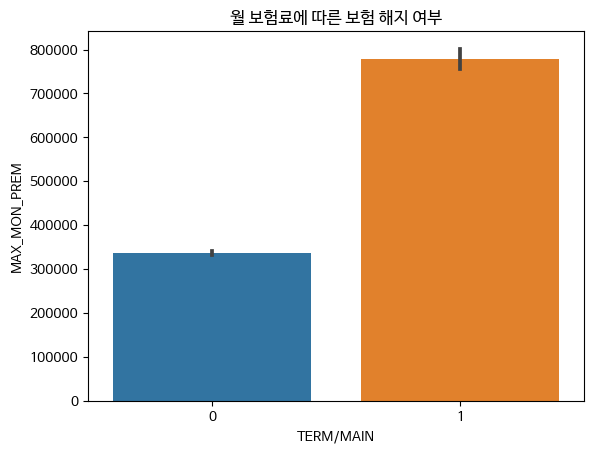

In [101]:
# 월 보험료(MAX_MON_PREM)에 따른 해지 여부 시각화
sns.barplot(x='TERM/MAIN', y='MAX_MON_PREM', data=df)
plt.title('월 보험료에 따른 보험 해지 여부')
plt.show()

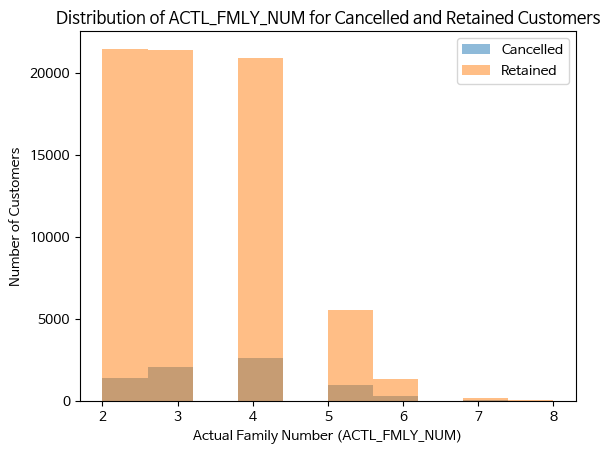

In [105]:
# 'TERM/MAIN'에 따라 데이터 분리 및 'ACTL_FMLY_NUM' >= 2 필터링
cancelled = df[(df['TERM/MAIN'] == 1) & (df['ACTL_FMLY_NUM'] >= 2)]
retained = df[(df['TERM/MAIN'] == 0) & (df['ACTL_FMLY_NUM'] >= 2)]

# 히스토그램 그리기
plt.hist(cancelled['ACTL_FMLY_NUM'], alpha=0.5, label='Cancelled')
plt.hist(retained['ACTL_FMLY_NUM'], alpha=0.5, label='Retained')
plt.xlabel('Actual Family Number (ACTL_FMLY_NUM)')
plt.ylabel('Number of Customers')
plt.title('Distribution of ACTL_FMLY_NUM for Cancelled and Retained Customers')
plt.legend()
plt.show()

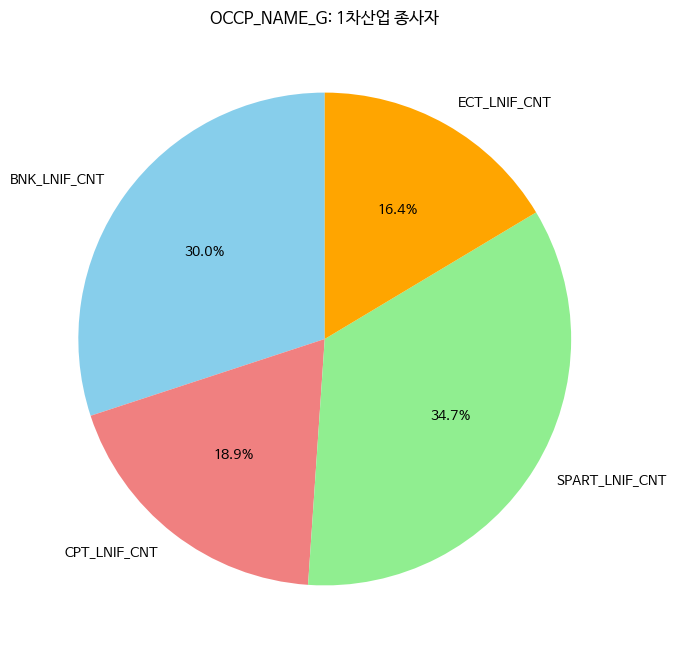

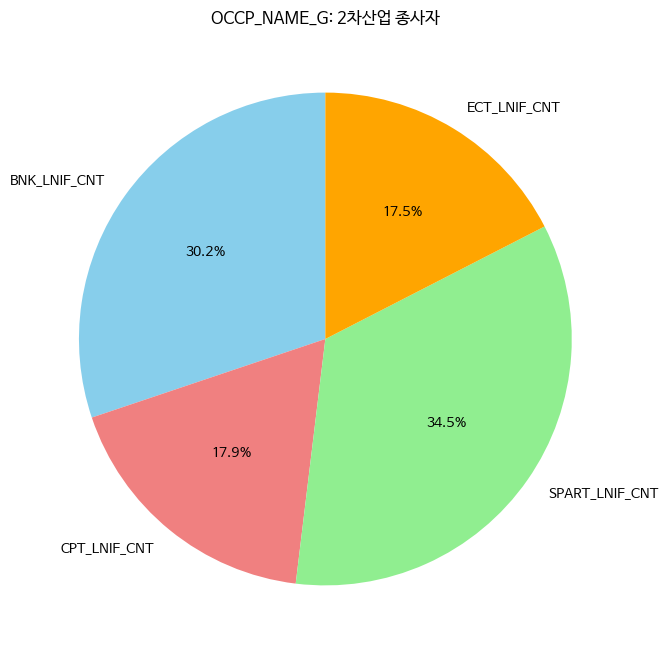

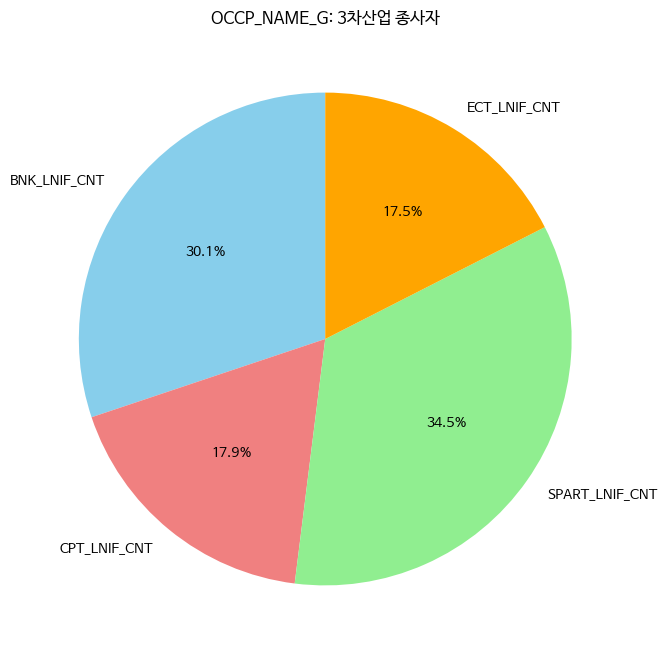

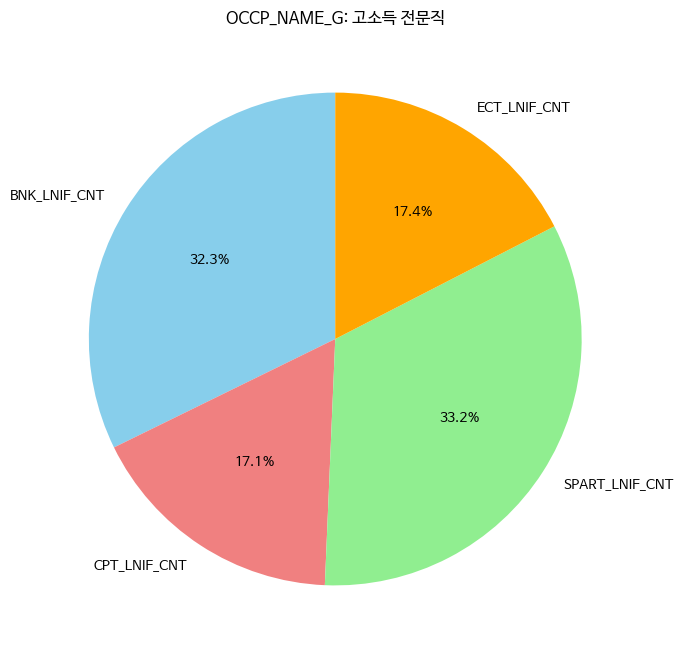

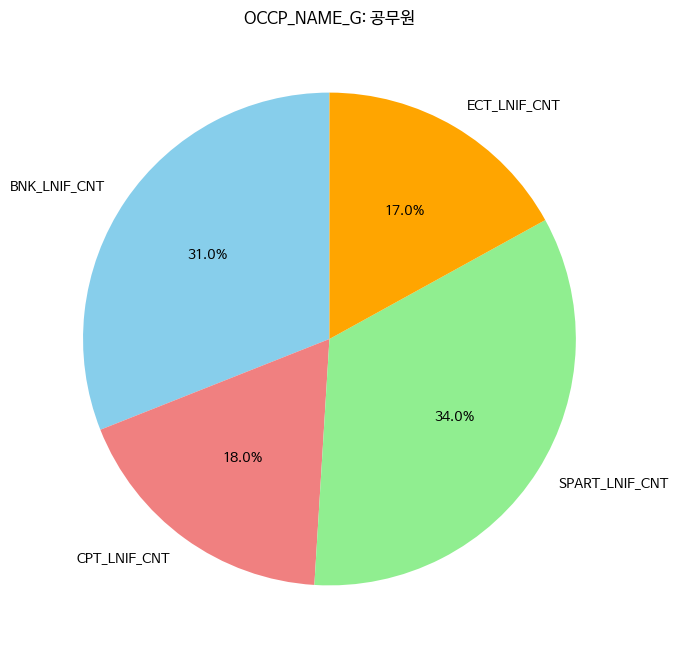

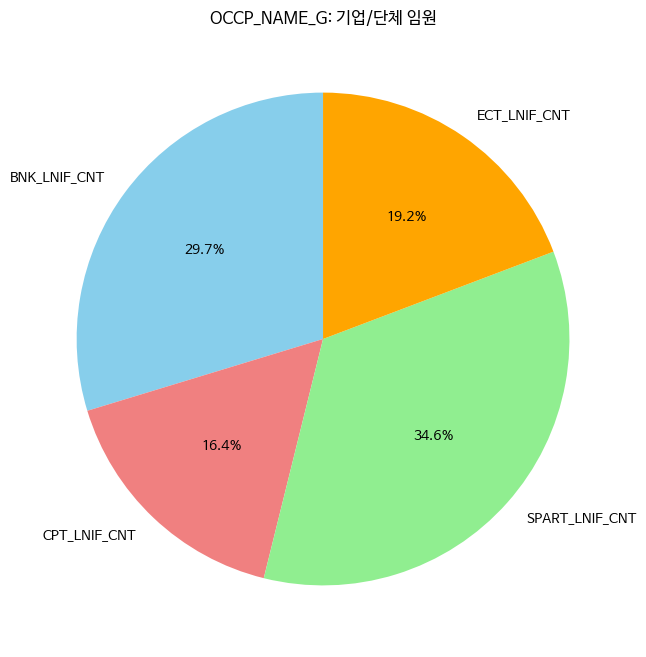

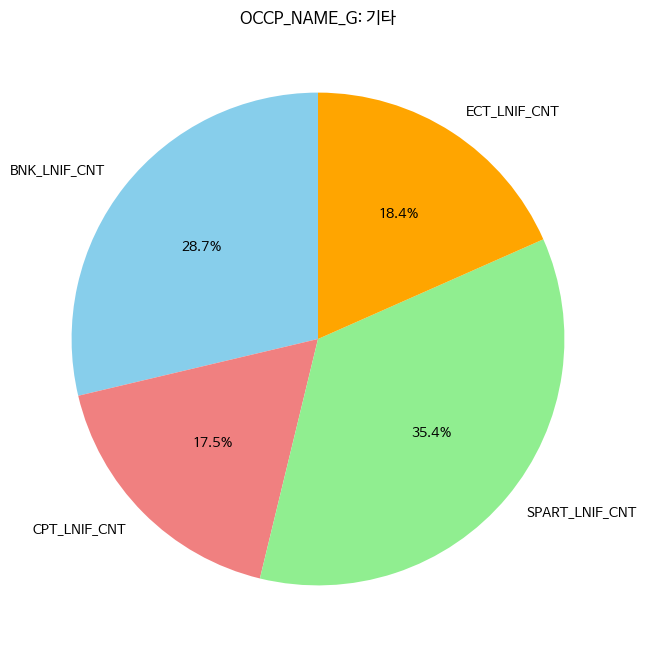

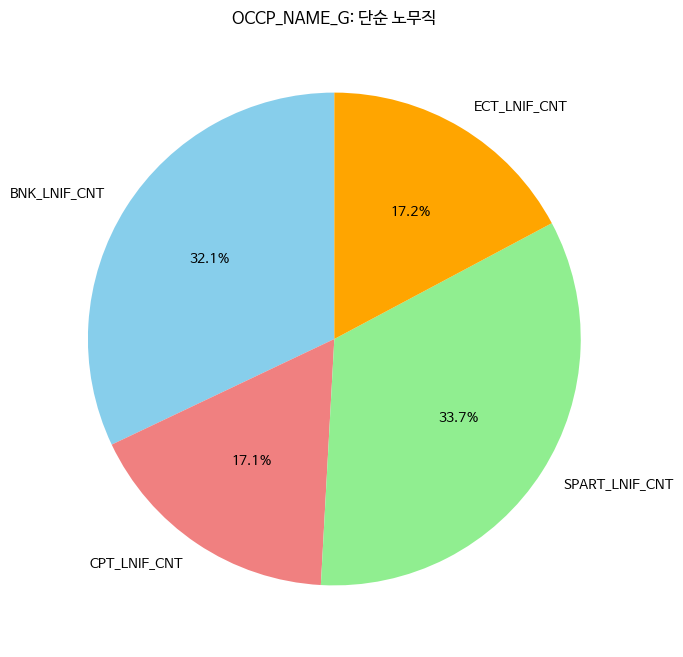

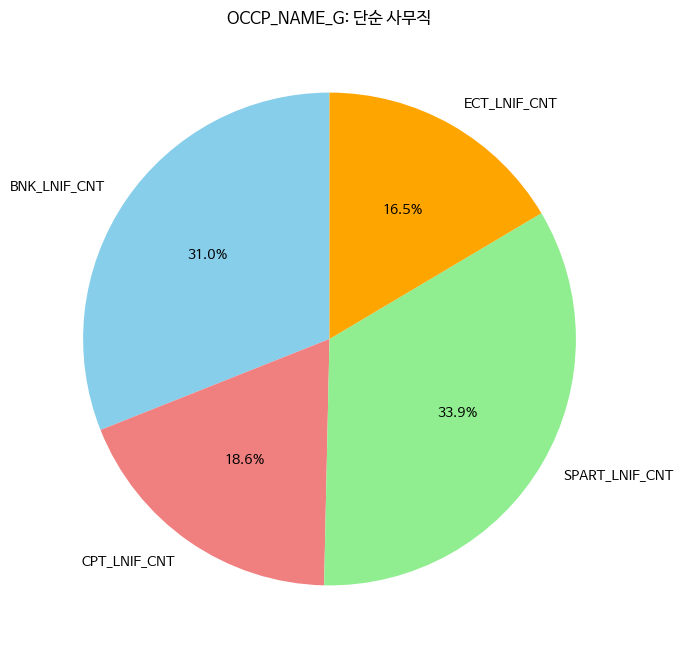

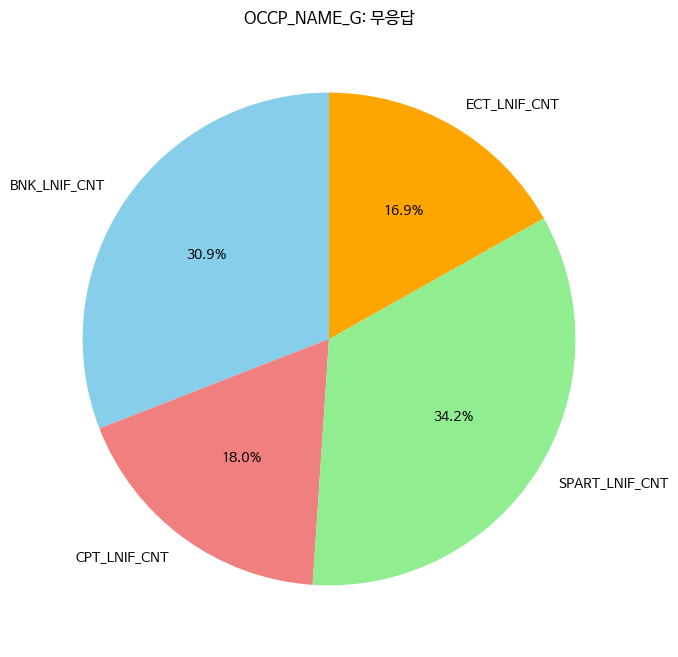

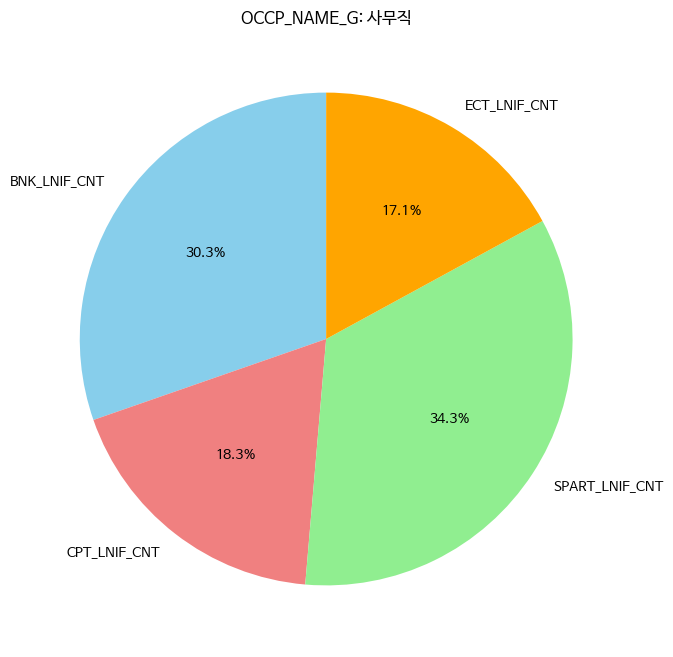

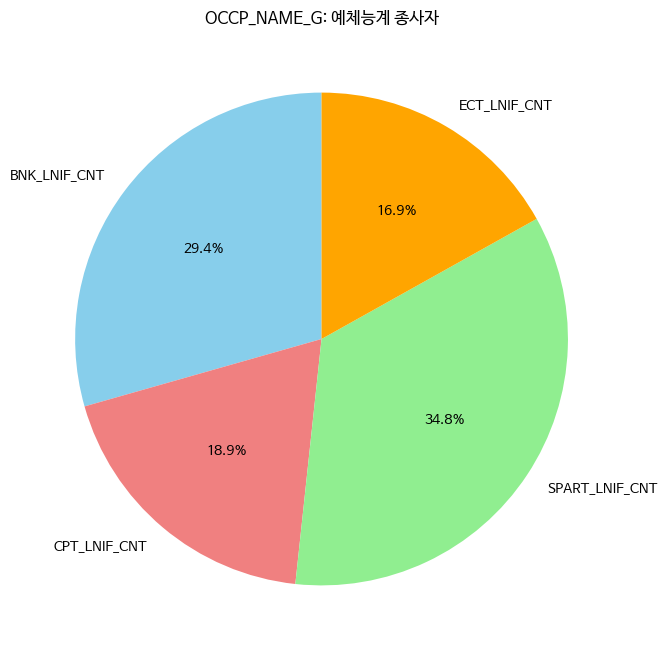

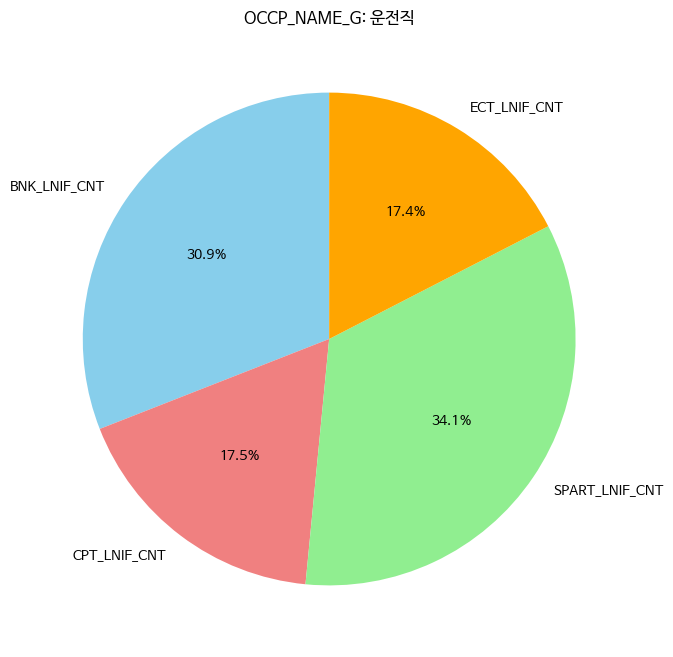

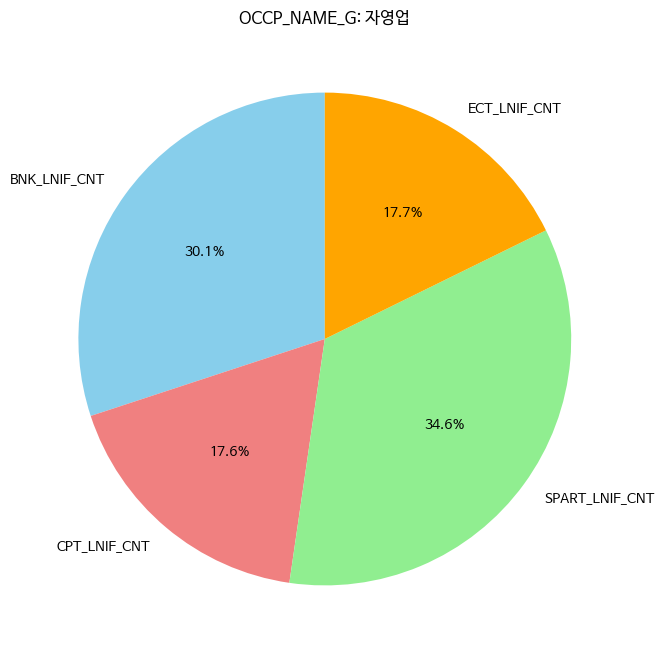

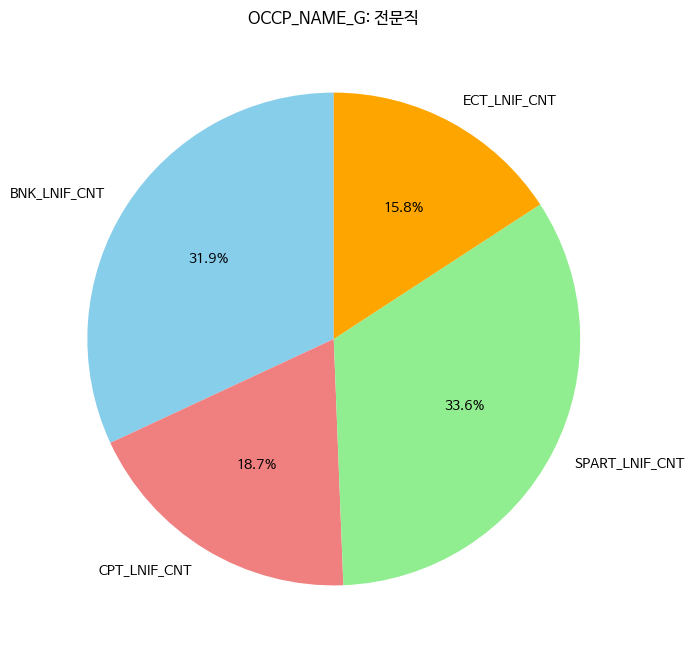

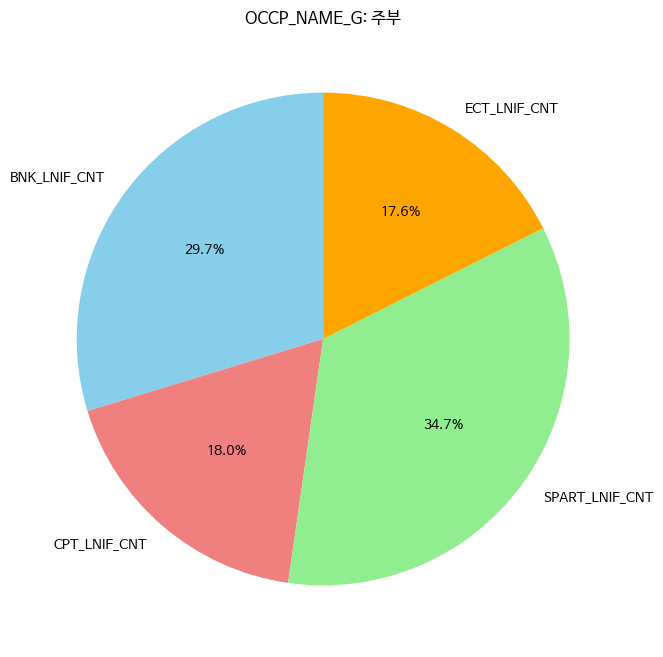

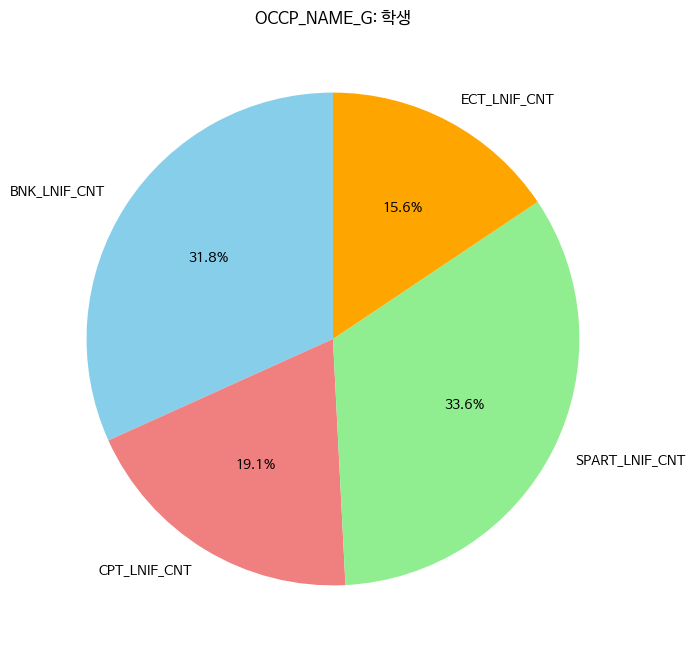

In [89]:
average_counts_by_occupation = df.groupby('OCCP_NAME_G')[['BNK_LNIF_CNT','CPT_LNIF_CNT','SPART_LNIF_CNT','ECT_LNIF_CNT']].mean()
# 파이 차트 그리기
for index, row in average_counts_by_occupation.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    plt.title(f'OCCP_NAME_G: {index}')
    plt.show()

In [ ]:
df['TERM/MAIN'] == 0